# 0. Data Understanding 

# 1.0 Datenvorbereitung

In [19]:
# Importieren wichtiger Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1 Einlesen und Überblick

In [20]:
# Bevor wir den Datensatz einlesen, legen wir die maximale Anzahl von Spalten fest, die in Python angezeigt werden sollen. 
# In vorliegenden Code möchten wir, dass es keine Begrenzung gibt. 

pd.options.display.max_columns = None


In [21]:
# Einlesen des Datensatzes und erster Überblick

data  = pd.read_csv("data.csv")
data.head()

,Zeitstempel,Filiale,Artikel,Menge,Umsatz,Bestellungen,Temperatur,Niederschlag,Globalstrahlung,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag
0,2016-01-03 08:01:46,Sulgen Filiale,Butterzopf mittel,1.0,6.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN
1,2016-01-03 08:04:45,Sulgen Filiale,Buttergipfeli,2.0,2.6,0.0,NaN,0.0,NaN,NaN,0.0,NaN
2,2016-01-03 08:09:21,Sulgen Filiale,Buttergipfeli,12.0,15.6,0.0,NaN,0.0,NaN,NaN,0.0,NaN
3,2016-01-03 08:11:19,Sulgen Filiale,Butterzopf mittel,1.0,6.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN
4,2016-01-03 08:11:19,Sulgen Filiale,Buttergipfeli,4.0,5.2,0.0,NaN,0.0,NaN,NaN,0.0,NaN


In [22]:
# Erstellen eines Ersatzdatensatzes
data_backup = data.copy()

### 1.2 Transformation des Datensatzes

In [23]:
# Konvertieren der Spalten in die richtigen Datentypen

data["Zeitstempel"] = pd.to_datetime(data["Zeitstempel"])
data["Uhrzeit"] = pd.to_datetime(data["Zeitstempel"]).dt.time
data["Stunde"] = pd.to_datetime(data["Zeitstempel"]).dt.hour
data["Datum"] = pd.to_datetime(data["Zeitstempel"]).dt.date
data["Wochentag"] = pd.to_datetime(data["Zeitstempel"]).dt.day_name()
data["Datum"] = pd.to_datetime(data["Datum"]).dt.date
data['Monat'] = pd.to_datetime(data['Datum']).dt.month

# Umwandeln der Variable Wochentag in numerische Werte
data["Wochentag"] = data["Wochentag"].replace(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], [1, 2, 3, 4, 5, 6, 7])


data.head()

,Zeitstempel,Filiale,Artikel,Menge,Umsatz,Bestellungen,Temperatur,Niederschlag,Globalstrahlung,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Uhrzeit,Stunde,Datum,Wochentag,Monat
0,2016-01-03 08:01:46,Sulgen Filiale,Butterzopf mittel,1.0,6.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,08:01:46,8,2016-01-03,7,1
1,2016-01-03 08:04:45,Sulgen Filiale,Buttergipfeli,2.0,2.6,0.0,NaN,0.0,NaN,NaN,0.0,NaN,08:04:45,8,2016-01-03,7,1
2,2016-01-03 08:09:21,Sulgen Filiale,Buttergipfeli,12.0,15.6,0.0,NaN,0.0,NaN,NaN,0.0,NaN,08:09:21,8,2016-01-03,7,1
3,2016-01-03 08:11:19,Sulgen Filiale,Butterzopf mittel,1.0,6.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,08:11:19,8,2016-01-03,7,1
4,2016-01-03 08:11:19,Sulgen Filiale,Buttergipfeli,4.0,5.2,0.0,NaN,0.0,NaN,NaN,0.0,NaN,08:11:19,8,2016-01-03,7,1


In [24]:
# ???Löschen???

# Festlegen der Reihenfolge der Wochentage
wochentag_reihenfolge = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
# @Moritz: Kann dieser Code gelöscht werden? Ich sehe keine weitere Verwendung von "wochentag_reihenfolge".

### 1.3 Entfernen unbrauchbarer Features


In [25]:
# Entfernen nicht mehr benötigter Features

data = data.drop(columns = ["Filiale", "Zeitstempel"], axis = "columns")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727754 entries, 0 to 727753
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Artikel                      727754 non-null  object 
 1   Menge                        727754 non-null  float64
 2   Umsatz                       727754 non-null  float64
 3   Bestellungen                 727754 non-null  float64
 4   Temperatur                   718722 non-null  float64
 5   Niederschlag                 725226 non-null  float64
 6   Globalstrahlung              718722 non-null  float64
 7   Temperatur Schnitt Tag       719687 non-null  float64
 8   Niederschlag Summe Tag       727754 non-null  float64
 9   Globalstrahlung Schnitt Tag  719687 non-null  float64
 10  Uhrzeit                      727754 non-null  object 
 11  Stunde                       727754 non-null  int64  
 12  Datum                        727754 non-null  object 
 13 

In [26]:
# Überprüfen, ob gewisse Transaktion ausserhalb der Öffnungszeiten verbucht wurden. Die Bäckerrei hat von 5:30 bis 19:00 geöffnet.

# Transaktionen vor offizieller Öffnungszeit.
data_4_uhr = data[data["Stunde"] == 4]
data_4_uhr.head()

# Entfernern der Transaktionen vor 5 Uhr, da Ausreisser gefunden wurden.
data = data[data["Stunde"] >= 5]



# Transaktionen nach offizieller Öffnungszeit.
data_20_uhr = data[data["Stunde"] == 20]
data_20_uhr.head()
# @Moritz: Im Datensatz haben wir zwei Transaktionen die um 20:00 Uhr verbucht wurden. Ich sehe aber nicht, dass diese 
# aus dem Code entfernt wurden, kann das sein? Wollen wir dies noch tun einfach wegen Vollständigkeit?


,Artikel,Menge,Umsatz,Bestellungen,Temperatur,Niederschlag,Globalstrahlung,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Uhrzeit,Stunde,Datum,Wochentag,Monat
28671,Hefe-Vanille-Weggli,1.0,1.7553,0.0,11.5,0.0,0.0,11.441667,0.0,257.291667,20:01:02,20,2016-04-21,4,4
28672,BT Nussgipfel,1.0,1.9947,0.0,11.5,0.0,0.0,11.441667,0.0,257.291667,20:01:02,20,2016-04-21,4,4


In [28]:
# neue Kolumnen für Temperatur und Globalstrahlung einfügen
data = data.drop(columns = ["Temperatur", "Globalstrahlung"], axis = "columns")
data.head()

,Artikel,Menge,Umsatz,Bestellungen,Niederschlag,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Uhrzeit,Stunde,Datum,Wochentag,Monat
0,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,08:01:46,8,2016-01-03,7,1
1,Buttergipfeli,2.0,2.6,0.0,0.0,NaN,0.0,NaN,08:04:45,8,2016-01-03,7,1
2,Buttergipfeli,12.0,15.6,0.0,0.0,NaN,0.0,NaN,08:09:21,8,2016-01-03,7,1
3,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,08:11:19,8,2016-01-03,7,1
4,Buttergipfeli,4.0,5.2,0.0,0.0,NaN,0.0,NaN,08:11:19,8,2016-01-03,7,1


In [27]:
# Entfernen von Dublikaten

data.drop_duplicates(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719185 entries, 0 to 727753
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Artikel                      719185 non-null  object 
 1   Menge                        719185 non-null  float64
 2   Umsatz                       719185 non-null  float64
 3   Bestellungen                 719185 non-null  float64
 4   Temperatur                   710279 non-null  float64
 5   Niederschlag                 716688 non-null  float64
 6   Globalstrahlung              710279 non-null  float64
 7   Temperatur Schnitt Tag       711227 non-null  float64
 8   Niederschlag Summe Tag       719185 non-null  float64
 9   Globalstrahlung Schnitt Tag  711227 non-null  float64
 10  Uhrzeit                      719185 non-null  object 
 11  Stunde                       719185 non-null  int64  
 12  Datum                        719185 non-null  object 
 13 

In [131]:
# Stückpreis berechnet
data["Stückpreis"] = pd.to_numeric(data["Umsatz"] / data["Menge"]).apply(lambda x: '{:.2f}'.format(x))

# Sortieren nach Stückpreis
data_preis = data.sort_values(by='Stückpreis', ascending=True)

In [132]:
n_produkte = data["Artikel"].unique()

# Erstellen einer Produktliste mit der verkauften Anzahl
produkt_liste = data[["Artikel", "Menge"]].groupby("Artikel").sum().sort_values(by="Menge", ascending=False).reset_index()


print("Es sind folgende Produkte im Datensatz enthalten: ")
print(produkt_liste)

Es sind folgende Produkte im Datensatz enthalten: 
                   Artikel     Menge
0            Buttergipfeli  380642.5
1       Laugengi.mit SoBlu  186385.0
2               Maisgipfel  179040.6
3             Laugenbrötli   95742.5
4            Weggli normal   83048.0
5          St. Gallerbürli   79097.0
6           Crèmeschnitten   70883.0
7            BT Nussgipfel   63750.3
8              Quarkzöpfli   62926.0
9        Butterzopf mittel   62808.0
10           Schoggibrötli   43800.0
11  Il pollo forte gefüllt   42087.0
12     Hefe-Vanille-Weggli   39990.0
13           Erdbeertörtli   26792.0


In [133]:
data.head()

,Artikel,Menge,Umsatz,Bestellungen,Niederschlag,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Uhrzeit,Stunde,Datum,Wochentag,Monat,Stückpreis
0,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,08:01:46,8,2016-01-03,7,1,6.00
1,Buttergipfeli,2.0,2.6,0.0,0.0,NaN,0.0,NaN,08:04:45,8,2016-01-03,7,1,1.30
2,Buttergipfeli,12.0,15.6,0.0,0.0,NaN,0.0,NaN,08:09:21,8,2016-01-03,7,1,1.30
3,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,08:11:19,8,2016-01-03,7,1,6.00
4,Buttergipfeli,4.0,5.2,0.0,0.0,NaN,0.0,NaN,08:11:19,8,2016-01-03,7,1,1.30


In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719185 entries, 0 to 727753
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Artikel                      719185 non-null  object 
 1   Menge                        719185 non-null  float64
 2   Umsatz                       719185 non-null  float64
 3   Bestellungen                 719185 non-null  float64
 4   Niederschlag                 716688 non-null  float64
 5   Temperatur Schnitt Tag       711227 non-null  float64
 6   Niederschlag Summe Tag       719185 non-null  float64
 7   Globalstrahlung Schnitt Tag  711227 non-null  float64
 8   Uhrzeit                      719185 non-null  object 
 9   Stunde                       719185 non-null  int64  
 10  Datum                        719185 non-null  object 
 11  Wochentag                    719185 non-null  int64  
 12  Monat                        719185 non-null  int64  
 13 

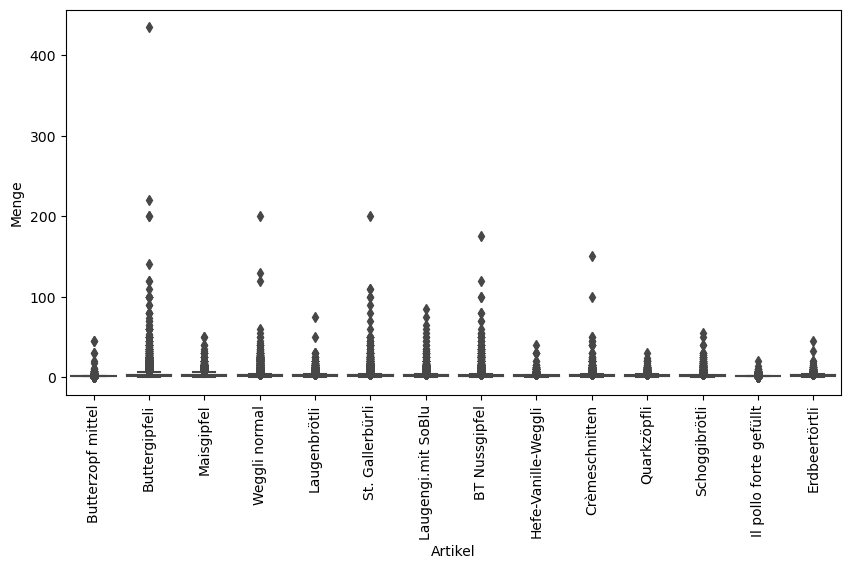

In [135]:
# Boxplot aller Artikel
plt.figure(figsize=(10, 5))
sns.boxplot(x='Artikel', y='Menge', data=data)
plt.xticks(rotation=90)
plt.show() 

Hohe Ausreißer in den Einzelbestellungen decken sich mit schlechter Performance im Modell

In [136]:
# Löschen der Artikel mit einer verkauften Menge > 20
data = data[data["Menge"] <= 20]

# Weiteres Löschen bei Artikeln mit noch kleineren Mengen


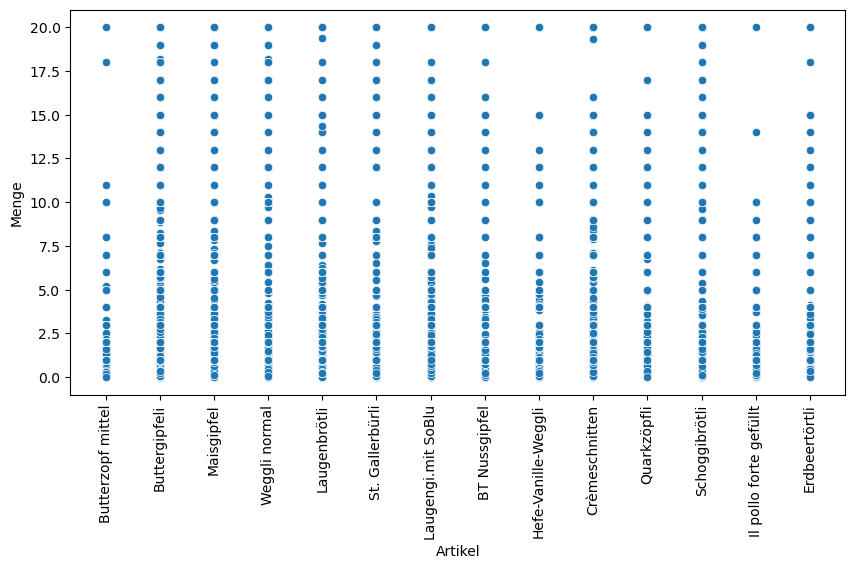

In [137]:
# Scatterplot für Bestellungen
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Artikel', y='Menge', data=data)
plt.xticks(rotation=90)
plt.show()


## 2.3 Hinzufügen weiterer Features

Gruppieren der Daten nach Artikel und Datum

In [138]:
# Gruppieren der Daten nach Datum und berechnen der Summe der Menge pro Artikel
sum_cols = ['Menge', 'Bestellungen', 'Umsatz']

mean_cols = ['Temperatur Schnitt Tag','Niederschlag Summe Tag', 
             'Globalstrahlung Schnitt Tag']

for col in data.columns:
    if col.startswith(('Ferienzeit', 'Geschmack', 'Feiertag', 'Vortag von', 'Ferienzeit SG', 'Wochentag', 'Monat')):
        mean_cols.append(col)

agg_dict = {col: 'sum' for col in sum_cols}
agg_dict.update({col: 'mean' for col in mean_cols})

data = data.groupby(['Datum', 'Artikel']).agg(agg_dict).reset_index()

# Ersetzen der Leerzeichen in Artikel mit Unterstrich
data['Artikel'] = data['Artikel'].str.replace(' ', '_')
data.head()

,Datum,Artikel,Menge,Bestellungen,Umsatz,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Wochentag,Monat
0,2016-01-03,BT_Nussgipfel,17.0,0.0,42.5,NaN,0.0,NaN,7.0,1.0
1,2016-01-03,Buttergipfeli,198.0,0.0,257.4,NaN,0.0,NaN,7.0,1.0
2,2016-01-03,Butterzopf_mittel,47.0,0.0,282.0,NaN,0.0,NaN,7.0,1.0
3,2016-01-03,Crèmeschnitten,33.0,0.0,102.3,NaN,0.0,NaN,7.0,1.0
4,2016-01-03,Hefe-Vanille-Weggli,21.0,0.0,46.2,NaN,0.0,NaN,7.0,1.0


### 2.3.0 Feiertage

#### 2.3.0.0 Feiertage aus Liste einlesen
Quelle: https://www.feiertagskalender.ch/index.php?geo=2173&jahr=2016&klasse=5&hl=de

In [139]:
import pandas as pd

# Read the CSV file into a pandas dataframe
holidays_df = pd.read_csv('Liste_Feiertage.csv', delimiter=';')

# Convert the Date column to datetime format
holidays_df['Datum'] = pd.to_datetime(holidays_df['Datum'], format='%d.%m.%Y')

# Rename the 'Datum' column to match the 'Datum' column in the data dataframe
holidays_df = holidays_df.rename(columns={'Datum': 'Holiday_Datum', 'Feiertag': 'Feiertag Name'})

# Convert the 'Datum' column in the data dataframe to datetime format
data['Datum'] = pd.to_datetime(data['Datum'])

# Merge data and holidays_df dataframes on the date
data = data.merge(holidays_df[['Holiday_Datum', 'Feiertag Name']], left_on='Datum', right_on='Holiday_Datum', how='left')

# Fill the missing values in the 'Feiertag Name' column with 'normaler Tag'
data['Feiertag Name'] = data['Feiertag Name'].fillna('normaler Tag')

# Drop the unnecessary 'Holiday_Datum' column
data = data.drop(columns='Holiday_Datum')

# Print the first 5 rows of the dataframe
data.head()


,Datum,Artikel,Menge,Bestellungen,Umsatz,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Wochentag,Monat,Feiertag Name
0,2016-01-03,BT_Nussgipfel,17.0,0.0,42.5,NaN,0.0,NaN,7.0,1.0,normaler Tag
1,2016-01-03,Buttergipfeli,198.0,0.0,257.4,NaN,0.0,NaN,7.0,1.0,normaler Tag
2,2016-01-03,Butterzopf_mittel,47.0,0.0,282.0,NaN,0.0,NaN,7.0,1.0,normaler Tag
3,2016-01-03,Crèmeschnitten,33.0,0.0,102.3,NaN,0.0,NaN,7.0,1.0,normaler Tag
4,2016-01-03,Hefe-Vanille-Weggli,21.0,0.0,46.2,NaN,0.0,NaN,7.0,1.0,normaler Tag


#### 2.3.0.1 Valentinstag

In [140]:
data.loc[data['Feiertag Name'] == 'Valentinstag']

,Datum,Artikel,Menge,Bestellungen,Umsatz,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Wochentag,Monat,Feiertag Name
506,2016-02-14,BT_Nussgipfel,40.0,0.0,100.0,5.300000,0.0,38.458333,7.0,2.0,Valentinstag
507,2016-02-14,Buttergipfeli,205.0,0.0,266.5,5.300000,0.0,38.458333,7.0,2.0,Valentinstag
508,2016-02-14,Butterzopf_mittel,48.0,0.0,288.0,5.300000,0.0,38.458333,7.0,2.0,Valentinstag
509,2016-02-14,Crèmeschnitten,56.0,0.0,173.6,5.300000,0.0,38.458333,7.0,2.0,Valentinstag
510,2016-02-14,Hefe-Vanille-Weggli,29.0,0.0,63.8,5.300000,0.0,38.458333,7.0,2.0,Valentinstag
...,...,...,...,...,...,...,...,...,...,...,...
23689,2021-02-14,Maisgipfel,162.0,11200.0,243.0,-6.354167,0.0,114.083333,7.0,2.0,Valentinstag
23690,2021-02-14,Quarkzöpfli,53.0,1250.0,206.7,-6.354167,0.0,114.083333,7.0,2.0,Valentinstag
23691,2021-02-14,Schoggibrötli,58.0,1600.0,139.2,-6.354167,0.0,114.083333,7.0,2.0,Valentinstag
23692,2021-02-14,St._Gallerbürli,41.0,1140.0,57.4,-6.354167,0.0,114.083333,7.0,2.0,Valentinstag


#### 2.3.0.2 Fasnacht hinzufügen

Es werden Listen erstellt für den Schmutzigen Donnerstag, den Faschingdienstag und den Aschermittwoch. Alle drei Feiertage sind keine gesetzlichen Feiertage im Kanton TG, werden aber auf Empfehlung von Roger Mohn hinzugefügt. 

In [141]:
# Listen mit den Fasnachts-Feiertagen und ihren Datumsangaben erstellen
schmutzigerDonnerstag = ['2016-02-04', '2017-02-23', '2018-02-08', '2019-02-28', '2020-02-20', '2021-02-11', '2022-02-24']
fasnachtsdienstag = ['2016-02-09', '2017-02-28', '2018-02-13', '2019-03-05', '2020-02-25', '2021-02-16', '2022-03-01' ]
aschermittwoch = ['2016-03-10', '2017-03-01', '2018-02-14', '2019-03-06', '2020-02-26', '2021-02-17', '2022-03-02']

# Schmutziger Donnerstag zuweisen
data.loc[data['Datum'].isin(schmutzigerDonnerstag), 'Feiertag Name'] = 'Schmutziger Donnerstag'

# Fasnachtsdienstag zuweisen
data.loc[data['Datum'].isin(fasnachtsdienstag), 'Feiertag Name'] = 'Fasnachtsdienstag'

# Aschermittwoch zuweisen
data.loc[data['Datum'].isin(aschermittwoch), 'Feiertag Name'] = 'Aschermittwoch'

In [142]:
# Testen, ob Werte im dataframe hinzugefügt wurden
sorted_data_nachSchmutzigerDonnerstag = data[data['Feiertag Name'].str.startswith('Schmutziger Donnerstag')].sort_values(by=['Feiertag Name'])
sorted_data_nachSchmutzigerDonnerstag.head()

,Datum,Artikel,Menge,Bestellungen,Umsatz,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Wochentag,Monat,Feiertag Name
383,2016-02-04,BT_Nussgipfel,14.0,0.0,35.0000,3.890909,1.6,12.636364,4.0,2.0,Schmutziger Donnerstag
19029,2020-02-20,Crèmeschnitten,20.0,260.0,70.0000,5.895833,0.0,106.750000,4.0,2.0,Schmutziger Donnerstag
19028,2020-02-20,Butterzopf_mittel,10.0,100.0,64.0000,5.895833,0.0,106.750000,4.0,2.0,Schmutziger Donnerstag
19027,2020-02-20,Buttergipfeli,121.0,3660.0,168.0027,5.895833,0.0,106.750000,4.0,2.0,Schmutziger Donnerstag
19026,2020-02-20,BT_Nussgipfel,35.0,380.0,97.4415,5.895833,0.0,106.750000,4.0,2.0,Schmutziger Donnerstag


In [143]:
data['Artikel'].unique()

array(['BT_Nussgipfel', 'Buttergipfeli', 'Butterzopf_mittel',
       'Crèmeschnitten', 'Hefe-Vanille-Weggli', 'Laugenbrötli',
       'Laugengi.mit_SoBlu', 'Maisgipfel', 'St._Gallerbürli',
       'Weggli_normal', 'Il_pollo_forte_gefüllt', 'Quarkzöpfli',
       'Schoggibrötli', 'Erdbeertörtli'], dtype=object)

#### 2.3.0.3 Erste Plots für Feiertage

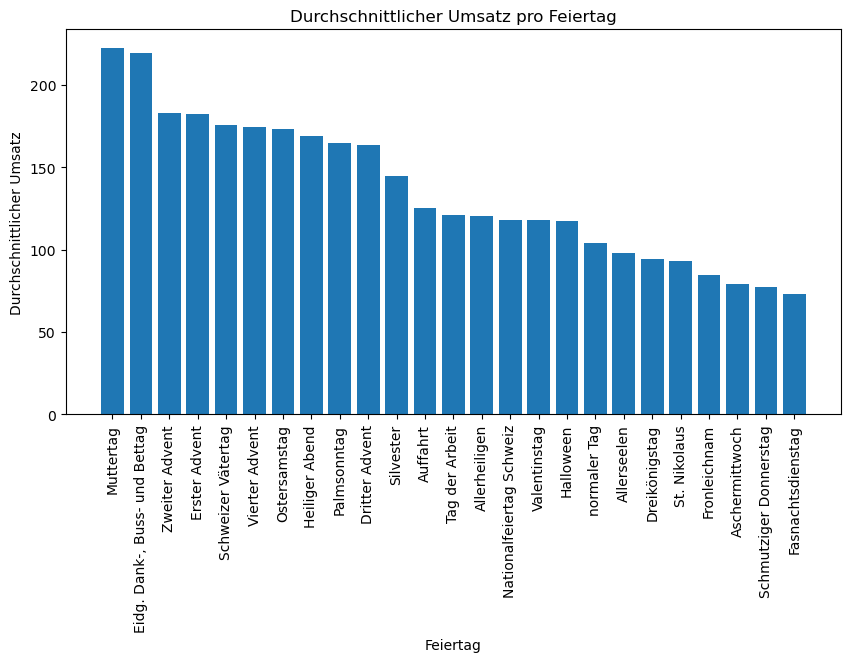

In [144]:
#erstelle einen Plot für den durchschnittlichen Umsatz pro Feiertag

plt.figure(figsize= (10, 5))
plt.bar(data.groupby("Feiertag Name")["Umsatz"].mean().sort_values(ascending = False).index, data.groupby("Feiertag Name")["Umsatz"].mean().sort_values(ascending = False))
plt.title("Durchschnittlicher Umsatz pro Feiertag")
plt.xlabel("Feiertag")
plt.ylabel("Durchschnittlicher Umsatz")
plt.xticks(rotation = 90)

plt.show()

In [145]:
#die informationen aus dem plot in eine Tabelle ausgeben
data.groupby("Feiertag Name")["Umsatz"].mean().sort_values(ascending = False).reset_index()


,Feiertag Name,Umsatz
0,Muttertag,222.463764
1,"Eidg. Dank-, Buss- und Bettag",219.163069
2,Zweiter Advent,182.746139
3,Erster Advent,182.449225
4,Schweizer Vätertag,175.739876
5,Vierter Advent,174.462761
6,Ostersamstag,173.391301
7,Heiliger Abend,168.842321
8,Palmsonntag,164.567533
9,Dritter Advent,163.279086


In [146]:
#Einen neuen, leeren Dataframe machen namens "Tag vor Feiertag"
data_vor_feiertag = pd.DataFrame()

#dem neuen Dataframe die Spalten "Datum" und "Vortag von" zuweisen
data_vor_feiertag["Datum"] = ""
data_vor_feiertag["Vortag von"] = ""

#Die Spalte "Datum" soll in den Datentyp "datetime" konvertiert werden
data_vor_feiertag["Datum"] = pd.to_datetime(data_vor_feiertag["Datum"]).dt.date

#für die Datum spalte im dataframe "data_vor_feiertag" soll der Vortag von jedem Feiertag aus dem holidays_df eingetragen werden
i = len(holidays_df)

while i > 0:
    data_vor_feiertag.at[i-1, "Datum"] = holidays_df.at[i-1, "Holiday_Datum"] - pd.Timedelta(days=1)
    data_vor_feiertag.at[i-1, "Vortag von"] = holidays_df.at[i-1, "Feiertag Name"]
    i = i - 1

#Die Daten sollen zum Format YYYY-MM-DD konvertiert werden
data_vor_feiertag["Datum"] = pd.to_datetime(data_vor_feiertag["Datum"]).dt.strftime('%Y-%m-%d')

#in jeden Eintrag mit "Vortag von" soll der Wert "Vortag" beigefügt werden vor dem Feiertag
data_vor_feiertag["Vortag von"] = data_vor_feiertag["Vortag von"].apply(lambda x: "Vortag " + x)

# Create a list of "Datum" dates
datum_dates = data_vor_feiertag['Datum'].tolist()

data_vor_feiertag.head()

,Datum,Vortag von
181,2022-02-13,Vortag Valentinstag
180,2022-01-05,Vortag Dreikönigstag
179,2022-01-01,Vortag Berchtoldstag
178,2021-12-31,Vortag Neujahrstag
177,2021-12-30,Vortag Silvester


In [147]:
# Nun soll dem Datensatz eine weitere Spalte "Vorfeiertag" eingefügt werden

data['Vortag von'] = ''

#If the date is in the list of holiday dates, then fill this new column with the name of the holiday from the holidays_df dataframe

for index, row in data.iterrows():
    if row['Datum'].strftime('%Y-%m-%d') in datum_dates:
        data.at[index, 'Vortag von'] = data_vor_feiertag.loc[data_vor_feiertag['Datum'] == row['Datum'].strftime('%Y-%m-%d'), 'Vortag von'].values[0]
    else:
        data.at[index, 'Vortag von'] = 'normaler Tag'

# Print the first 5 rows of the dataframe
data.head()

,Datum,Artikel,Menge,Bestellungen,Umsatz,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Wochentag,Monat,Feiertag Name,Vortag von
0,2016-01-03,BT_Nussgipfel,17.0,0.0,42.5,NaN,0.0,NaN,7.0,1.0,normaler Tag,normaler Tag
1,2016-01-03,Buttergipfeli,198.0,0.0,257.4,NaN,0.0,NaN,7.0,1.0,normaler Tag,normaler Tag
2,2016-01-03,Butterzopf_mittel,47.0,0.0,282.0,NaN,0.0,NaN,7.0,1.0,normaler Tag,normaler Tag
3,2016-01-03,Crèmeschnitten,33.0,0.0,102.3,NaN,0.0,NaN,7.0,1.0,normaler Tag,normaler Tag
4,2016-01-03,Hefe-Vanille-Weggli,21.0,0.0,46.2,NaN,0.0,NaN,7.0,1.0,normaler Tag,normaler Tag


In [148]:
data['Artikel'].unique()

array(['BT_Nussgipfel', 'Buttergipfeli', 'Butterzopf_mittel',
       'Crèmeschnitten', 'Hefe-Vanille-Weggli', 'Laugenbrötli',
       'Laugengi.mit_SoBlu', 'Maisgipfel', 'St._Gallerbürli',
       'Weggli_normal', 'Il_pollo_forte_gefüllt', 'Quarkzöpfli',
       'Schoggibrötli', 'Erdbeertörtli'], dtype=object)

### 2.3.1 Schulferien TG

In [149]:
import datetime
erstes_datum = data['Datum'].min()
letztes_datum = data['Datum'].max()

print("Das erste Datum im Datensatz ist:", erstes_datum)
print("Das letzte Datum im Datensatz ist:", letztes_datum)

# Daten von https://av.tg.ch/public/upload/assets/8713/10_Jahresplan_Schulferien_Volksschule_2019_-_2029.pdf?fp=3
# Daten von https://www.schulferien.org/schweiz/kalender/thurgau/2019/


gesamtliste_herbstferien = []
gesamtliste_weihnachtsferien = []
gesamtliste_sportferien = []
gesamtliste_fruehlingsferien = []
gesamtliste_pfingstferien = []
gesamtliste_sommerferien = []


Das erste Datum im Datensatz ist: 2016-01-03 00:00:00
Das letzte Datum im Datensatz ist: 2022-02-11 00:00:00


#### Schuljahr 2015/ 2016

In [150]:
# Herbstferien Schuljahr 2015 / 2016
# brauchen wir nicht

# Weihnachtsferien Schuljahr 2015 / 2016
ferienbeginn_weihnachten2015_2016 = datetime.date(2015, 12, 24)
ferienende_weihnachten2015_2016 = datetime.date(2016, 1, 3)

current_date = ferienbeginn_weihnachten2015_2016
weihnachtsferien_tg_sj_2015_2016 = []

while current_date <= ferienende_weihnachten2015_2016:
    weihnachtsferien_tg_sj_2015_2016.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sportferien Schuljahr 2015 / 2016
ferienbeginn_sport2015_2016 = datetime.date(2016, 2, 1)
ferienende_sport2015_2016 = datetime.date(2016, 2, 7)

current_date = ferienbeginn_sport2015_2016
sportferien_tg_sj_2015_2016 = []

while current_date <= ferienende_sport2015_2016:
    sportferien_tg_sj_2015_2016.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Frühlingsferien Schuljahr 2015 / 2016
ferienbeginn_fruehling2015_2016 = datetime.date(2016, 3, 25)
ferienende_fruehling2015_2016 = datetime.date(2016, 4, 10)

current_date = ferienbeginn_fruehling2015_2016
fruehlingsferien_tg_sj_2015_2016 = []

while current_date <= ferienende_fruehling2015_2016:
    fruehlingsferien_tg_sj_2015_2016.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Pfingstferien Schuljahr 2015 / 2016
ferienbeginn_pfingsten2015_2016 = datetime.date(2016, 5, 5)
ferienende_pfingsten2015_2016 = datetime.date(2016, 5, 16)

current_date = ferienbeginn_pfingsten2015_2016
pfingstferien_tg_sj_2015_2016 = []

while current_date <= ferienende_pfingsten2015_2016:
    pfingstferien_tg_sj_2015_2016.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sommerferien Schuljahr 2015 / 2016
ferienbeginn_sommer2015_2016 = datetime.date(2016, 7, 11)
ferienende_sommer2015_2016 = datetime.date(2016, 8, 14)

current_date = ferienbeginn_sommer2015_2016
sommerferien_tg_sj_2015_2016 = []

while current_date <= ferienende_sommer2015_2016:
    sommerferien_tg_sj_2015_2016.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)


gesamtliste_weihnachtsferien.extend(weihnachtsferien_tg_sj_2015_2016)
gesamtliste_sportferien.extend(sportferien_tg_sj_2015_2016)
gesamtliste_fruehlingsferien.extend(fruehlingsferien_tg_sj_2015_2016)
gesamtliste_pfingstferien.extend(pfingstferien_tg_sj_2015_2016)
gesamtliste_sommerferien.extend(sommerferien_tg_sj_2015_2016)

#### Schuljahr 2016/ 2017

In [151]:
# Herbstferien Schuljahr 2016 / 2017
ferienbeginn_herbst2016_2017 = datetime.date(2016, 10, 10)
ferienende_herbst2016_2017 = datetime.date(2016, 10, 23)

current_date = ferienbeginn_herbst2016_2017
herbstferien_tg_sj_2016_2017 = []

while current_date <= ferienende_herbst2016_2017:
    herbstferien_tg_sj_2016_2017.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Weihnachtsferien Schuljahr 2016 / 2017
ferienbeginn_weihnachten2016_2017 = datetime.date(2016, 12, 26)
ferienende_weihnachten2016_2017 = datetime.date(2017, 1, 8)

current_date = ferienbeginn_weihnachten2016_2017
weihnachtsferien_tg_sj_2016_2017 = []

while current_date <= ferienende_weihnachten2016_2017:
    weihnachtsferien_tg_sj_2016_2017.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sportferien Schuljahr 2016 / 2017
ferienbeginn_sport2016_2017 = datetime.date(2017, 1, 30)
ferienende_sport2016_2017 = datetime.date(2017, 2, 5)

current_date = ferienbeginn_sport2016_2017
sportferien_tg_sj_2016_2017 = []

while current_date <= ferienende_sport2016_2017:
    sportferien_tg_sj_2016_2017.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Frühlingsferien Schuljahr 2016 / 2017
ferienbeginn_fruehling2016_2017 = datetime.date(2017, 4, 3)
ferienende_fruehling2016_2017 = datetime.date(2017, 4, 17)

current_date = ferienbeginn_fruehling2016_2017
fruehlingsferien_tg_sj_2016_2017 = []

while current_date <= ferienende_fruehling2016_2017:
    fruehlingsferien_tg_sj_2016_2017.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Pfingstferien Schuljahr 2016 / 2017
ferienbeginn_pfingsten2016_2017 = datetime.date(2017, 5, 25)
ferienende_pfingsten2016_2017 = datetime.date(2017, 6, 5)

current_date = ferienbeginn_pfingsten2016_2017
pfingstferien_tg_sj_2016_2017 = []

while current_date <= ferienende_pfingsten2016_2017:
    pfingstferien_tg_sj_2016_2017.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sommerferien Schuljahr 2016 / 2017
ferienbeginn_sommer2016_2017 = datetime.date(2017, 7, 10)
ferienende_sommer2016_2017 = datetime.date(2017, 8, 13)

current_date = ferienbeginn_sommer2016_2017
sommerferien_tg_sj_2016_2017 = []

while current_date <= ferienende_sommer2016_2017:
    sommerferien_tg_sj_2016_2017.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

gesamtliste_herbstferien.extend(herbstferien_tg_sj_2016_2017)
gesamtliste_weihnachtsferien.extend(weihnachtsferien_tg_sj_2016_2017)
gesamtliste_sportferien.extend(sportferien_tg_sj_2016_2017)
gesamtliste_fruehlingsferien.extend(fruehlingsferien_tg_sj_2016_2017)
gesamtliste_pfingstferien.extend(pfingstferien_tg_sj_2016_2017)
gesamtliste_sommerferien.extend(sommerferien_tg_sj_2016_2017)



#### Schuljahr 2017/ 2018

In [152]:
# Herbstferien Schuljahr 2017 / 2018
ferienbeginn_herbst2017_2018 = datetime.date(2017, 10, 9)
ferienende_herbst2017_2018 = datetime.date(2017, 10, 22)

current_date = ferienbeginn_herbst2017_2018
herbstferien_tg_sj_2017_2018 = []

while current_date <= ferienende_herbst2017_2018:
    herbstferien_tg_sj_2017_2018.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Weihnachtsferien Schuljahr 2017 / 2018
ferienbeginn_weihnachten2017_2018 = datetime.date(2017, 12, 25)
ferienende_weihnachten2017_2018 = datetime.date(2018, 1, 7)

current_date = ferienbeginn_weihnachten2017_2018
weihnachtsferien_tg_sj_2017_2018 = []

while current_date <= ferienende_weihnachten2017_2018:
    weihnachtsferien_tg_sj_2017_2018.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sportferien Schuljahr 2017 / 2018
ferienbeginn_sport2017_2018 = datetime.date(2018, 1, 29)
ferienende_sport2017_2018 = datetime.date(2018, 2, 4)

current_date = ferienbeginn_sport2017_2018
sportferien_tg_sj_2017_2018 = []

while current_date <= ferienende_sport2017_2018:
    sportferien_tg_sj_2017_2018.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Frühlingsferien Schuljahr 2017 / 2018
ferienbeginn_fruehling2017_2018 = datetime.date(2018, 3, 30)
ferienende_fruehling2017_2018 = datetime.date(2018, 4, 15)

current_date = ferienbeginn_fruehling2017_2018
fruehlingsferien_tg_sj_2017_2018 = []

while current_date <= ferienende_fruehling2017_2018:
    fruehlingsferien_tg_sj_2017_2018.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Pfingstferien Schuljahr 2017 / 2018
ferienbeginn_pfingsten2017_2018 = datetime.date(2018, 5, 10)
ferienende_pfingsten2017_2018 = datetime.date(2018, 5, 21)

current_date = ferienbeginn_pfingsten2017_2018
pfingstferien_tg_sj_2017_2018 = []

while current_date <= ferienende_pfingsten2017_2018:
    pfingstferien_tg_sj_2017_2018.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sommerferien Schuljahr 2017 / 2018
ferienbeginn_sommer2017_2018 = datetime.date(2018, 7, 9)
ferienende_sommer2017_2018 = datetime.date(2018, 8, 12)

current_date = ferienbeginn_sommer2017_2018
sommerferien_tg_sj_2017_2018 = []

while current_date <= ferienende_sommer2017_2018:
    sommerferien_tg_sj_2017_2018.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

gesamtliste_herbstferien.extend(herbstferien_tg_sj_2017_2018)
gesamtliste_weihnachtsferien.extend(weihnachtsferien_tg_sj_2017_2018)
gesamtliste_sportferien.extend(sportferien_tg_sj_2017_2018)
gesamtliste_fruehlingsferien.extend(fruehlingsferien_tg_sj_2017_2018)
gesamtliste_pfingstferien.extend(pfingstferien_tg_sj_2017_2018)
gesamtliste_sommerferien.extend(sommerferien_tg_sj_2017_2018)

#### Schuljahr 2018/ 2019

In [153]:
# Herbstferien Schuljahr 2018 / 2019
ferienbeginn_herbst2018_2019 = datetime.date(2018, 10, 8)
ferienende_herbst2018_2019 = datetime.date(2018, 10, 21)

current_date = ferienbeginn_herbst2018_2019
herbstferien_tg_sj_2018_2019 = []

while current_date <= ferienende_herbst2018_2019:
    herbstferien_tg_sj_2018_2019.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Weihnachtsferien Schuljahr 2018 / 2019
ferienbeginn_weihnachten2018_2019 = datetime.date(2018, 12, 24)
ferienende_weihnachten2018_2019 = datetime.date(2019, 1, 6)

current_date = ferienbeginn_weihnachten2018_2019
weihnachtsferien_tg_sj_2018_2019 = []

while current_date <= ferienende_weihnachten2018_2019:
    weihnachtsferien_tg_sj_2018_2019.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sportferien Schuljahr 2018 / 2019
ferienbeginn_sport2018_2019 = datetime.date(2019, 1, 28)
ferienende_sport2018_2019 = datetime.date(2019, 2, 3)

current_date = ferienbeginn_sport2018_2019
sportferien_tg_sj_2018_2019 = []

while current_date <= ferienende_sport2018_2019:
    sportferien_tg_sj_2018_2019.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Frühlingsferien Schuljahr 2018 / 2019
ferienbeginn_fruehling2018_2019 = datetime.date(2019, 4, 19)
ferienende_fruehling2018_2019 = datetime.date(2019, 4, 22)

current_date = ferienbeginn_fruehling2018_2019
fruehlingsferien_tg_sj_2018_2019 = []

while current_date <= ferienende_fruehling2018_2019:
    fruehlingsferien_tg_sj_2018_2019.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Pfingstferien Schuljahr 2018 / 2019
ferienbeginn_pfingsten2018_2019 = datetime.date(2019, 5, 30)
ferienende_pfingsten2018_2019 = datetime.date(2019, 6, 10)

current_date = ferienbeginn_pfingsten2018_2019
pfingstferien_tg_sj_2018_2019 = []

while current_date <= ferienende_pfingsten2018_2019:
    pfingstferien_tg_sj_2018_2019.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sommerferien Schuljahr 2018 / 2019
ferienbeginn_sommer2018_2019 = datetime.date(2019, 7, 8)
ferienende_sommer2018_2019 = datetime.date(2019, 8, 11)

current_date = ferienbeginn_sommer2018_2019
sommerferien_tg_sj_2018_2019 = []

while current_date <= ferienende_sommer2018_2019:
    sommerferien_tg_sj_2018_2019.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

gesamtliste_herbstferien.extend(herbstferien_tg_sj_2018_2019)
gesamtliste_weihnachtsferien.extend(weihnachtsferien_tg_sj_2018_2019)
gesamtliste_sportferien.extend(sportferien_tg_sj_2018_2019)
gesamtliste_fruehlingsferien.extend(fruehlingsferien_tg_sj_2018_2019)
gesamtliste_pfingstferien.extend(pfingstferien_tg_sj_2018_2019)
gesamtliste_sommerferien.extend(sommerferien_tg_sj_2018_2019)

#### Schuljahr 2019/ 2020

In [154]:
# Herbstferien Schuljahr 2019 / 2020
ferienbeginn_herbst2019_2020 = datetime.date(2019, 10, 7)
ferienende_herbst2019_2020 = datetime.date(2019, 10, 20)

current_date = ferienbeginn_herbst2019_2020
herbstferien_tg_sj_2019_2020 = []

while current_date <= ferienende_herbst2019_2020:
    herbstferien_tg_sj_2019_2020.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Weihnachtsferien Schuljahr 2019 / 2020
ferienbeginn_weihnachten2019_2020 = datetime.date(2019, 12, 23)
ferienende_weihnachten2019_2020 = datetime.date(2020, 1, 5)

current_date = ferienbeginn_weihnachten2019_2020
weihnachtsferien_tg_sj_2019_2020 = []

while current_date <= ferienende_weihnachten2019_2020:
    weihnachtsferien_tg_sj_2019_2020.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sportferien Schuljahr 2019 / 2020
ferienbeginn_sport2019_2020 = datetime.date(2020, 1, 27)
ferienende_sport2019_2020 = datetime.date(2020, 2, 2)

current_date = ferienbeginn_sport2019_2020
sportferien_tg_sj_2019_2020 = []

while current_date <= ferienende_sport2019_2020:
    sportferien_tg_sj_2019_2020.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Frühlingsferien Schuljahr 2019 / 2020
ferienbeginn_fruehling2019_2020 = datetime.date(2020, 3, 30)
ferienende_fruehling2019_2020 = datetime.date(2020, 4, 13)

current_date = ferienbeginn_fruehling2019_2020
fruehlingsferien_tg_sj_2019_2020 = []

while current_date <= ferienende_fruehling2019_2020:
    fruehlingsferien_tg_sj_2019_2020.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Pfingstferien Schuljahr 2019 / 2020
ferienbeginn_pfingsten2019_2020 = datetime.date(2020, 5, 21)
ferienende_pfingsten2019_2020 = datetime.date(2020, 6, 1)

current_date = ferienbeginn_pfingsten2019_2020
pfingstferien_tg_sj_2019_2020 = []

while current_date <= ferienende_pfingsten2019_2020:
    pfingstferien_tg_sj_2019_2020.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sommerferien Schuljahr 2019 / 2020
ferienbeginn_sommer2019_2020 = datetime.date(2020, 7, 6)
ferienende_sommer2019_2020 = datetime.date(2020, 8, 9)

current_date = ferienbeginn_sommer2019_2020
sommerferien_tg_sj_2019_2020 = []

while current_date <= ferienende_sommer2019_2020:
    sommerferien_tg_sj_2019_2020.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

gesamtliste_herbstferien.extend(herbstferien_tg_sj_2019_2020)
gesamtliste_weihnachtsferien.extend(weihnachtsferien_tg_sj_2019_2020)
gesamtliste_sportferien.extend(sportferien_tg_sj_2019_2020)
gesamtliste_fruehlingsferien.extend(fruehlingsferien_tg_sj_2019_2020)
gesamtliste_pfingstferien.extend(pfingstferien_tg_sj_2019_2020)
gesamtliste_sommerferien.extend(sommerferien_tg_sj_2019_2020)

#### Schuljahr 2020/ 2021

In [155]:
# Herbstferien Schuljahr 2020 / 2021
ferienbeginn_herbst2020_2021 = datetime.date(2020, 10, 5)
ferienende_herbst2020_2021 = datetime.date(2020, 10, 18)

current_date = ferienbeginn_herbst2020_2021
herbstferien_tg_sj_2020_2021 = []

while current_date <= ferienende_herbst2020_2021:
    herbstferien_tg_sj_2020_2021.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Weihnachtsferien Schuljahr 2020 / 2021
ferienbeginn_weihnachten2020_2021 = datetime.date(2020, 12, 21)
ferienende_weihnachten2020_2021 = datetime.date(2021, 1, 3)

current_date = ferienbeginn_weihnachten2020_2021
weihnachtsferien_tg_sj_2020_2021 = []

while current_date <= ferienende_weihnachten2020_2021:
    weihnachtsferien_tg_sj_2020_2021.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sportferien Schuljahr 2020 / 2021
ferienbeginn_sport2020_2021 = datetime.date(2021, 2, 1)
ferienende_sport2020_2021 = datetime.date(2021, 2, 7)

current_date = ferienbeginn_sport2020_2021
sportferien_tg_sj_2020_2021 = []

while current_date <= ferienende_sport2020_2021:
    sportferien_tg_sj_2020_2021.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Frühlingsferien Schuljahr 2020 / 2021
ferienbeginn_fruehling2020_2021 = datetime.date(2021, 4, 2)
ferienende_fruehling2020_2021 = datetime.date(2021, 4, 18)

current_date = ferienbeginn_fruehling2020_2021
fruehlingsferien_tg_sj_2020_2021 = []

while current_date <= ferienende_fruehling2020_2021:
    fruehlingsferien_tg_sj_2020_2021.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Pfingstferien Schuljahr 2020 / 2021
ferienbeginn_pfingsten2020_2021 = datetime.date(2021, 5, 13)
ferienende_pfingsten2020_2021 = datetime.date(2021, 5, 24)

current_date = ferienbeginn_pfingsten2020_2021
pfingstferien_tg_sj_2020_2021 = []

while current_date <= ferienende_pfingsten2020_2021:
    pfingstferien_tg_sj_2020_2021.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sommerferien Schuljahr 2020 / 2021
ferienbeginn_sommer2020_2021 = datetime.date(2021, 7, 12)
ferienende_sommer2020_2021 = datetime.date(2021, 8, 15)

current_date = ferienbeginn_sommer2020_2021
sommerferien_tg_sj_2020_2021 = []

while current_date <= ferienende_sommer2020_2021:
    sommerferien_tg_sj_2020_2021.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

gesamtliste_herbstferien.extend(herbstferien_tg_sj_2020_2021)
gesamtliste_weihnachtsferien.extend(weihnachtsferien_tg_sj_2020_2021)
gesamtliste_sportferien.extend(sportferien_tg_sj_2020_2021)
gesamtliste_fruehlingsferien.extend(fruehlingsferien_tg_sj_2020_2021)
gesamtliste_pfingstferien.extend(pfingstferien_tg_sj_2020_2021)
gesamtliste_sommerferien.extend(sommerferien_tg_sj_2020_2021)

#### Schuljahr 2021/ 2022

In [156]:
# Herbstferien Schuljahr 2021 / 2022
ferienbeginn_herbst2021_2022 = datetime.date(2021, 10, 11)
ferienende_herbst2021_2022 = datetime.date(2021, 10, 24)

current_date = ferienbeginn_herbst2021_2022
herbstferien_tg_sj_2021_2022 = []

while current_date <= ferienende_herbst2021_2022:
    herbstferien_tg_sj_2021_2022.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Weihnachtsferien Schuljahr 2021 / 2022
ferienbeginn_weihnachten2021_2022 = datetime.date(2021, 12, 20)
ferienende_weihnachten2021_2022 = datetime.date(2022, 1, 2)

current_date = ferienbeginn_weihnachten2021_2022
weihnachtsferien_tg_sj_2021_2022 = []

while current_date <= ferienende_weihnachten2021_2022:
    weihnachtsferien_tg_sj_2021_2022.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sportferien Schuljahr 2021 / 2022
ferienbeginn_sport2021_2022 = datetime.date(2022, 1, 31)
ferienende_sport2021_2022 = datetime.date(2022, 2, 6)

current_date = ferienbeginn_sport2021_2022
sportferien_tg_sj_2021_2022 = []

while current_date <= ferienende_sport2021_2022:
    sportferien_tg_sj_2021_2022.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# mehr brauchen wir zurzeit nicht

gesamtliste_herbstferien.extend(herbstferien_tg_sj_2021_2022)
gesamtliste_weihnachtsferien.extend(weihnachtsferien_tg_sj_2021_2022)
gesamtliste_sportferien.extend(sportferien_tg_sj_2021_2022)


#### Schulferienzeiten TG in Dataframe hinzufügen

In [157]:
print(gesamtliste_herbstferien)
data['Datum'] = pd.to_datetime(data['Datum'])

data['Ferienzeit TG'] = 'Keine Ferienzeit'

data.loc[data['Datum'].isin(gesamtliste_herbstferien), 'Ferienzeit TG'] = 'Herbstferien'
data.loc[data['Datum'].isin(gesamtliste_weihnachtsferien), 'Ferienzeit TG'] = 'Weihnachtsferien'
data.loc[data['Datum'].isin(gesamtliste_sportferien), 'Ferienzeit TG'] = 'Sportferien'
data.loc[data['Datum'].isin(gesamtliste_fruehlingsferien), 'Ferienzeit TG'] = 'Frühlingsferien'
data.loc[data['Datum'].isin(gesamtliste_pfingstferien), 'Ferienzeit TG'] = 'Pfingstferien'
data.loc[data['Datum'].isin(gesamtliste_sommerferien), 'Ferienzeit TG'] = 'Sommerferien'

data.head()

['2016-10-10', '2016-10-11', '2016-10-12', '2016-10-13', '2016-10-14', '2016-10-15', '2016-10-16', '2016-10-17', '2016-10-18', '2016-10-19', '2016-10-20', '2016-10-21', '2016-10-22', '2016-10-23', '2017-10-09', '2017-10-10', '2017-10-11', '2017-10-12', '2017-10-13', '2017-10-14', '2017-10-15', '2017-10-16', '2017-10-17', '2017-10-18', '2017-10-19', '2017-10-20', '2017-10-21', '2017-10-22', '2018-10-08', '2018-10-09', '2018-10-10', '2018-10-11', '2018-10-12', '2018-10-13', '2018-10-14', '2018-10-15', '2018-10-16', '2018-10-17', '2018-10-18', '2018-10-19', '2018-10-20', '2018-10-21', '2019-10-07', '2019-10-08', '2019-10-09', '2019-10-10', '2019-10-11', '2019-10-12', '2019-10-13', '2019-10-14', '2019-10-15', '2019-10-16', '2019-10-17', '2019-10-18', '2019-10-19', '2019-10-20', '2020-10-05', '2020-10-06', '2020-10-07', '2020-10-08', '2020-10-09', '2020-10-10', '2020-10-11', '2020-10-12', '2020-10-13', '2020-10-14', '2020-10-15', '2020-10-16', '2020-10-17', '2020-10-18', '2021-10-11', '2021

,Datum,Artikel,Menge,Bestellungen,Umsatz,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Wochentag,Monat,Feiertag Name,Vortag von,Ferienzeit TG
0,2016-01-03,BT_Nussgipfel,17.0,0.0,42.5,NaN,0.0,NaN,7.0,1.0,normaler Tag,normaler Tag,Weihnachtsferien
1,2016-01-03,Buttergipfeli,198.0,0.0,257.4,NaN,0.0,NaN,7.0,1.0,normaler Tag,normaler Tag,Weihnachtsferien
2,2016-01-03,Butterzopf_mittel,47.0,0.0,282.0,NaN,0.0,NaN,7.0,1.0,normaler Tag,normaler Tag,Weihnachtsferien
3,2016-01-03,Crèmeschnitten,33.0,0.0,102.3,NaN,0.0,NaN,7.0,1.0,normaler Tag,normaler Tag,Weihnachtsferien
4,2016-01-03,Hefe-Vanille-Weggli,21.0,0.0,46.2,NaN,0.0,NaN,7.0,1.0,normaler Tag,normaler Tag,Weihnachtsferien


In [158]:
data['Artikel'].unique()

array(['BT_Nussgipfel', 'Buttergipfeli', 'Butterzopf_mittel',
       'Crèmeschnitten', 'Hefe-Vanille-Weggli', 'Laugenbrötli',
       'Laugengi.mit_SoBlu', 'Maisgipfel', 'St._Gallerbürli',
       'Weggli_normal', 'Il_pollo_forte_gefüllt', 'Quarkzöpfli',
       'Schoggibrötli', 'Erdbeertörtli'], dtype=object)

#### 2.3.1.1 Plots Ferienzeit TG

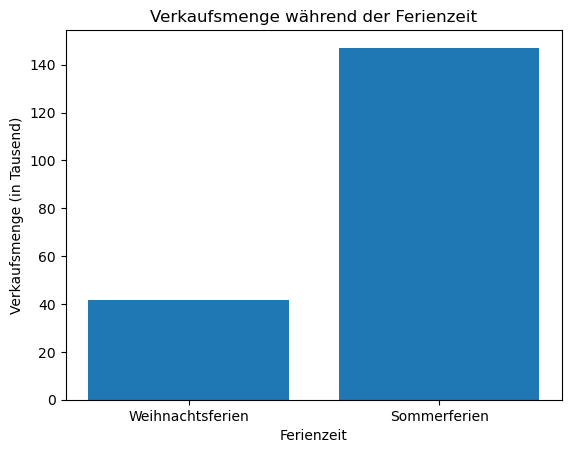

In [159]:
# Daten für Weihnachtsferien filtern und Menge summieren
weihnachtsferien = data[data['Ferienzeit TG'] == 'Weihnachtsferien']
weihnachtsferien_summe = weihnachtsferien['Menge'].sum() / 1000

# Daten für Sommerferien filtern und Menge summieren
sommerferien = data[data['Ferienzeit TG'] == 'Sommerferien']
sommerferien_summe = sommerferien['Menge'].sum() / 1000

# Balkendiagramm erstellen
ferien = ['Weihnachtsferien', 'Sommerferien']
verkaufsmenge = [weihnachtsferien_summe, sommerferien_summe]

plt.bar(ferien, verkaufsmenge)
plt.xlabel('Ferienzeit')
plt.ylabel('Verkaufsmenge (in Tausend)')
plt.title('Verkaufsmenge während der Ferienzeit')
plt.show()


Obwohl die Sommerferien nur doppelt so lange dauern wie die Winterferien, werden ca. drei Mal so viele Backwaren verkauft.

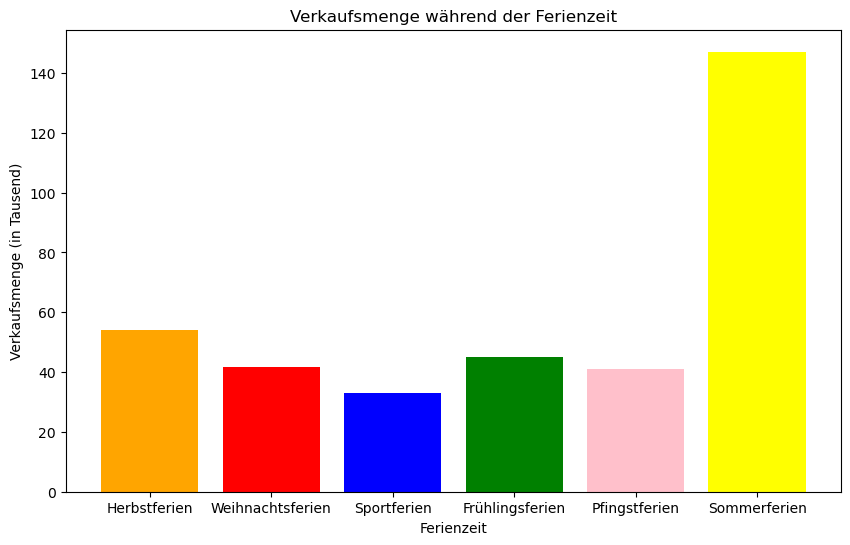

In [160]:
# Liste der Ferienzeiten
ferienzeiten = ['Herbstferien', 'Weihnachtsferien', 'Sportferien', 'Frühlingsferien', 'Pfingstferien', 'Sommerferien']

# Verkaufsmenge für jede Ferienzeit berechnen
verkaufsmenge = []
for ferienzeit in ferienzeiten:
    ferien = data[data['Ferienzeit TG'] == ferienzeit]
    ferien_summe = ferien['Menge'].sum() / 1000
    verkaufsmenge.append(ferien_summe)

# Farben definieren
farben = ['orange', 'red', 'blue', 'green', 'pink', 'yellow']

# Balkendiagramm erstellen
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(ferienzeiten, verkaufsmenge, color=farben)
ax.set_xlabel('Ferienzeit')
ax.set_ylabel('Verkaufsmenge (in Tausend)')
ax.set_title('Verkaufsmenge während der Ferienzeit')
plt.show()

Man sieht, die Zeit der Sommerferien ist mit Abstand die profitabelste Ferienzeit für die Bäckerei.

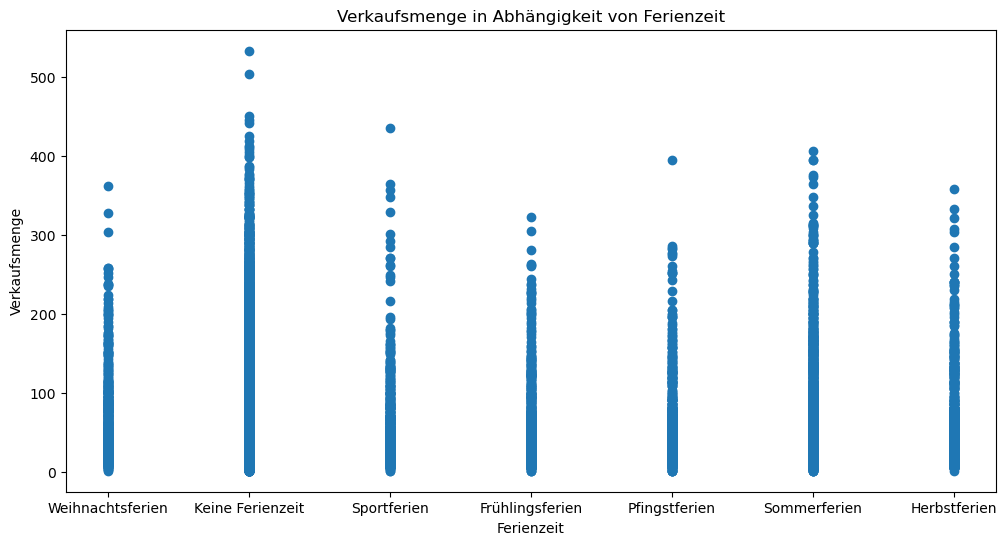

In [161]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(data['Ferienzeit TG'], data['Menge'])
ax.set_title('Verkaufsmenge in Abhängigkeit von Ferienzeit')
ax.set_xlabel('Ferienzeit')
ax.set_ylabel('Verkaufsmenge')
plt.show()

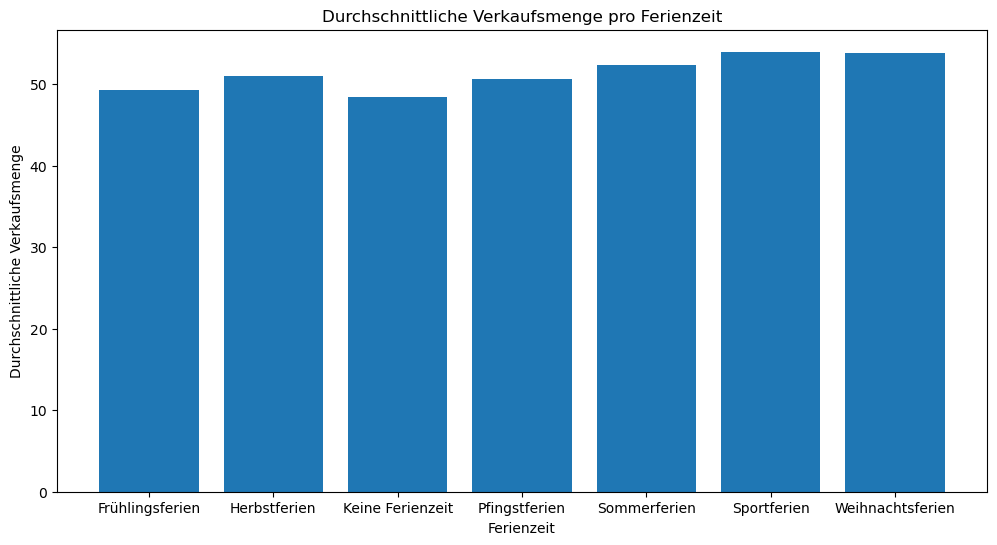

In [162]:
# Umwandeln der Ferienzeit-Spalte in eine kategorische Variable und Festlegen der Sortierung
ferienzeit_order = ["Herbstferien", "Weihnachtsferien", "Sportferien", "Frühlingsferien", "Pfingstferien", "Sommerferien"]


# Gruppieren nach Ferienzeit und Berechnen der durchschnittlichen Verkaufsmenge
grouped_data = data.groupby("Ferienzeit TG")["Menge"].mean()

# Erstellen des Balkendiagramms
plt.figure(figsize=(12, 6))
plt.bar(grouped_data.index, grouped_data.values)
plt.title("Durchschnittliche Verkaufsmenge pro Ferienzeit")
plt.xlabel("Ferienzeit")
plt.ylabel("Durchschnittliche Verkaufsmenge")
plt.show()


### 2.3.2 Schulferien SG

Im Kanton SG gibt es keine Pfingsferien, dafür aber eine Woche länger Herbstferien, als im Kanton TG. Weil sich das Einzugsgebiet der Mohn Filiale in Sulgen, auch über den benachbarten Kanton SG erstreckt, werden die Herbstferienwoche sowie die fehlende Woche Pfingstferien in einer neuen Spalte 'Ferienzeit SG' hinzugefügt. Im Kanton SG variieren die Sportferien bzw. Winterferien, je nach Gemeinde. Wir haben uns dafür entschieden, dieselbe Woche, wie für den Kanton TG dafür zu wählen.

In [163]:
import datetime

# Daten von https://www.feiertagskalender.ch/ferien.php?geo=1827&jahr=2021


# Ferienlisten nach Ferienzeit erstellen
gesamtliste_herbstferien_sg = []


#### Schuljahr 2016/ 2017

In [164]:
import datetime
# Herbstferien Schuljahr 2016 / 2017
ferienbeginn_sg_herbst2016_2017 = datetime.date(2016, 10, 3)
ferienende_sg_herbst2016_2017 = datetime.date(2016, 10, 23)

current_date = ferienbeginn_sg_herbst2016_2017
herbstferien_sg_sj_2016_2017 = []

while current_date <= ferienende_sg_herbst2016_2017:
    herbstferien_sg_sj_2016_2017.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

gesamtliste_herbstferien_sg.extend(herbstferien_sg_sj_2016_2017)

#### Schuljahr 2017/ 2018

In [165]:
import datetime
# Herbstferien Schuljahr 2017 / 2018
ferienbeginn_sg_herbst2017_2018 = datetime.date(2017, 10, 2)
ferienende_sg_herbst2017_2018 = datetime.date(2017, 10, 22)

current_date = ferienbeginn_sg_herbst2017_2018
herbstferien_sg_sj_2017_2018 = []

while current_date <= ferienende_sg_herbst2017_2018:
    herbstferien_sg_sj_2017_2018.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

gesamtliste_herbstferien_sg.extend(herbstferien_sg_sj_2017_2018)

#### Schuljahr 2018/ 2019

In [166]:
import datetime
# Herbstferien Schuljahr 2018 / 2019
ferienbeginn_sg_herbst2018_2019 = datetime.date(2018, 10, 1)
ferienende_sg_herbst2018_2019 = datetime.date(2018, 10, 21)

current_date = ferienbeginn_sg_herbst2018_2019
herbstferien_sg_sj_2018_2019 = []

while current_date <= ferienende_sg_herbst2018_2019:
    herbstferien_sg_sj_2018_2019.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

gesamtliste_herbstferien_sg.extend(herbstferien_sg_sj_2018_2019)

#### Schuljahr 2019/ 2020 

In [167]:
import datetime
# Herbstferien Schuljahr 2019 / 2020
ferienbeginn_sg_herbst2019_2020 = datetime.date(2019, 9, 30)
ferienende_sg_herbst2019_2020 = datetime.date(2019, 10, 20)

current_date = ferienbeginn_sg_herbst2019_2020
herbstferien_sg_sj_2019_2020 = []

while current_date <= ferienende_sg_herbst2019_2020:
    herbstferien_sg_sj_2019_2020.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

gesamtliste_herbstferien_sg.extend(herbstferien_sg_sj_2019_2020)

#### Schuljahr 2020/ 2021

In [168]:
import datetime
# Herbstferien Schuljahr 2020 / 2021
ferienbeginn_sg_herbst2020_2021 = datetime.date(2020, 9, 28)
ferienende_sg_herbst2020_2021 = datetime.date(2020, 10, 18)

current_date = ferienbeginn_sg_herbst2020_2021
herbstferien_sg_sj_2020_2021 = []

while current_date <= ferienende_sg_herbst2020_2021:
    herbstferien_sg_sj_2020_2021.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

gesamtliste_herbstferien_sg.extend(herbstferien_sg_sj_2020_2021)

#### Schuljahr 2021/ 2022

In [169]:
import datetime
# Herbstferien Schuljahr 2021 / 2022
ferienbeginn_sg_herbst2021_2022 = datetime.date(2021, 10, 4)
ferienende_sg_herbst2021_2022 = datetime.date(2021, 10, 24)

current_date = ferienbeginn_sg_herbst2021_2022
herbstferien_sg_sj_2021_2022 = []

while current_date <= ferienende_sg_herbst2021_2022:
    herbstferien_sg_sj_2021_2022.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

gesamtliste_herbstferien_sg.extend(herbstferien_sg_sj_2021_2022)

#### Schulferienzeiten SG in Dataframe hinzufügen

In [170]:
data['Datum'] = pd.to_datetime(data['Datum'])

data['Ferienzeit SG'] = 'Keine Ferienzeit'

# Abweichende Herbstferien SG zu hinzufügen
data.loc[data['Datum'].isin(gesamtliste_herbstferien_sg), 'Ferienzeit SG'] = 'Herbstferien'

# Pfingsferien werden nicht hinzugefügt

# Gleiche Ferientage TG und SG hinzufügen
data.loc[data['Datum'].isin(gesamtliste_weihnachtsferien), 'Ferienzeit SG'] = 'Weihnachtsferien'
data.loc[data['Datum'].isin(gesamtliste_sportferien), 'Ferienzeit SG'] = 'Sportferien'
data.loc[data['Datum'].isin(gesamtliste_fruehlingsferien), 'Ferienzeit SG'] = 'Frühlingsferien'
data.loc[data['Datum'].isin(gesamtliste_sommerferien), 'Ferienzeit SG'] = 'Sommerferien'

In [171]:
# Testen, ob Werte im dataframe hinzugefügt wurden
new_data = data[['Ferienzeit TG', 'Ferienzeit SG', 'Datum']]
sorted_data_nachHerbstferienSG = new_data[new_data['Ferienzeit SG'].str.startswith('Herbstferien')].sort_values(by=['Ferienzeit SG'])
sorted_data_nachHerbstferienSG.head(89999)

,Ferienzeit TG,Ferienzeit SG,Datum
3423,Keine Ferienzeit,Herbstferien,2016-10-03
21962,Keine Ferienzeit,Herbstferien,2020-09-29
21961,Keine Ferienzeit,Herbstferien,2020-09-28
21960,Keine Ferienzeit,Herbstferien,2020-09-28
21959,Keine Ferienzeit,Herbstferien,2020-09-28
...,...,...,...
12638,Keine Ferienzeit,Herbstferien,2018-10-01
12637,Keine Ferienzeit,Herbstferien,2018-10-01
12636,Keine Ferienzeit,Herbstferien,2018-10-01
12634,Keine Ferienzeit,Herbstferien,2018-10-01


In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28249 entries, 0 to 28248
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Datum                        28249 non-null  datetime64[ns]
 1   Artikel                      28249 non-null  object        
 2   Menge                        28249 non-null  float64       
 3   Bestellungen                 28249 non-null  float64       
 4   Umsatz                       28249 non-null  float64       
 5   Temperatur Schnitt Tag       27866 non-null  float64       
 6   Niederschlag Summe Tag       28249 non-null  float64       
 7   Globalstrahlung Schnitt Tag  27866 non-null  float64       
 8   Wochentag                    28249 non-null  float64       
 9   Monat                        28249 non-null  float64       
 10  Feiertag Name                28249 non-null  object        
 11  Vortag von                   28249 non-nu

In [173]:
data['Artikel'].unique()

array(['BT_Nussgipfel', 'Buttergipfeli', 'Butterzopf_mittel',
       'Crèmeschnitten', 'Hefe-Vanille-Weggli', 'Laugenbrötli',
       'Laugengi.mit_SoBlu', 'Maisgipfel', 'St._Gallerbürli',
       'Weggli_normal', 'Il_pollo_forte_gefüllt', 'Quarkzöpfli',
       'Schoggibrötli', 'Erdbeertörtli'], dtype=object)

### 2.3.3 Süß und Herzhaft

Wir vermuten einen Zusammenhang zwischen verkaufter Menge und ob ein Produkt süß oder herzhaft ist. Eine Hypothese ist hier beispielsweise, dass an manchen Tagen mehr süße Produkte als Herzhafte Produkte verkauft werden. So könnten Kunden vielleicht Montags eher süßes Gebäck kaufen, weil sie gestresst wegen der Arbeit sind. Genauso gut, könnte ein Peak aber auch richtung Wochenende liegen, da viele sich dann eher etwas süßes vom Bäcker gönnen. 

(Anmerkung: Wir haben die Christliche Fastenzeit nur bis Gründonnerstag beschränkt, obwohl sie streng genommen bis Ostersonntag geht. Grund dafür ist, dass viele Gebäck für die Feiertage im Voraus einkaufen)

In [174]:
data.head()

,Datum,Artikel,Menge,Bestellungen,Umsatz,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Wochentag,Monat,Feiertag Name,Vortag von,Ferienzeit TG,Ferienzeit SG
0,2016-01-03,BT_Nussgipfel,17.0,0.0,42.5,NaN,0.0,NaN,7.0,1.0,normaler Tag,normaler Tag,Weihnachtsferien,Weihnachtsferien
1,2016-01-03,Buttergipfeli,198.0,0.0,257.4,NaN,0.0,NaN,7.0,1.0,normaler Tag,normaler Tag,Weihnachtsferien,Weihnachtsferien
2,2016-01-03,Butterzopf_mittel,47.0,0.0,282.0,NaN,0.0,NaN,7.0,1.0,normaler Tag,normaler Tag,Weihnachtsferien,Weihnachtsferien
3,2016-01-03,Crèmeschnitten,33.0,0.0,102.3,NaN,0.0,NaN,7.0,1.0,normaler Tag,normaler Tag,Weihnachtsferien,Weihnachtsferien
4,2016-01-03,Hefe-Vanille-Weggli,21.0,0.0,46.2,NaN,0.0,NaN,7.0,1.0,normaler Tag,normaler Tag,Weihnachtsferien,Weihnachtsferien


In [175]:
# Manuelle Klassifizierung der Produkte in 'süss' und 'herzhaft'
produkte_süß_herzhaft = pd.DataFrame(produkt_liste['Artikel'])

geschmack_dict = {
    'Buttergipfeli': 'süss',
    'Laugengi.mit_SoBlu': 'herzhaft',
    'Maisgipfel': 'herzhaft', 
    'Laugenbrötli': 'herzhaft',
    'Weggli_normal': 'herzhaft', 
    'St._Gallerbürli': 'herzhaft',
    'Crèmeschnitten': 'süss',
    'BT_Nussgipfel': 'süss',
    'Quarkzöpfli': 'süss',
    'Butterzopf_mittel': 'süss',
    'Schoggibrötli': 'süss',
    'Il_pollo_forte_gefüllt': 'herzhaft',
    'Hefe-Vanille-Weggli': 'herzhaft',
    'Erdbeertörtli': 'süss'}

# Daten mit den manuell klassifizierten Produkten zusammenführen
#test = pd.merge(data, produkte_süß_herzhaft, on='Artikel')
#test = test.rename(columns={'Geschmack_y': 'Geschmack'})
#data = test.copy()
data['Geschmack'] = data['Artikel'].map(geschmack_dict)

print(data['Artikel'].unique())


['BT_Nussgipfel' 'Buttergipfeli' 'Butterzopf_mittel' 'Crèmeschnitten'
 'Hefe-Vanille-Weggli' 'Laugenbrötli' 'Laugengi.mit_SoBlu' 'Maisgipfel'
 'St._Gallerbürli' 'Weggli_normal' 'Il_pollo_forte_gefüllt' 'Quarkzöpfli'
 'Schoggibrötli' 'Erdbeertörtli']


In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28249 entries, 0 to 28248
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Datum                        28249 non-null  datetime64[ns]
 1   Artikel                      28249 non-null  object        
 2   Menge                        28249 non-null  float64       
 3   Bestellungen                 28249 non-null  float64       
 4   Umsatz                       28249 non-null  float64       
 5   Temperatur Schnitt Tag       27866 non-null  float64       
 6   Niederschlag Summe Tag       28249 non-null  float64       
 7   Globalstrahlung Schnitt Tag  27866 non-null  float64       
 8   Wochentag                    28249 non-null  float64       
 9   Monat                        28249 non-null  float64       
 10  Feiertag Name                28249 non-null  object        
 11  Vortag von                   28249 non-nu

### 2.3.4 Fastenzeit

Als erstes Fügen wir die Christliche Fastenzeit zum Datensatz hinzu, da wir vermuten, dass einige Menschen in der Fastenzeit zumindest weniger Alkohol und Süßigkeiten konsumieren. 

In [177]:
import datetime 
start_datum = data["Datum"].min()
end_datum = data["Datum"].max()

# Fastenzeit start und Enddaten zwischen 2015 und 2022
fastenzeit = [
    (datetime.date(2015, 2, 18), datetime.date(2015, 4, 2)),
    (datetime.date(2016, 2, 10), datetime.date(2016, 3, 24)),
    (datetime.date(2017, 3, 1), datetime.date(2017, 4, 16)),
    (datetime.date(2018, 2, 14), datetime.date(2018, 3, 29)),
    (datetime.date(2019, 3, 6), datetime.date(2019, 4, 18)),
    (datetime.date(2020, 2, 26), datetime.date(2020, 4, 9)),
    (datetime.date(2021, 2, 17), datetime.date(2021, 4, 1)),
    (datetime.date(2022, 3, 2), datetime.date(2022, 4, 14)),
]
# Function to check if a date is within Lent period
def is_lent(date):
    for start, end in fastenzeit:
        if start <= date.date() <= end:

        
            return 1
    return 0

# Anwendung der Funktion auf die Daten und Erstellung einer neuen Spalte
data['Fastenzeit'] = data["Datum"].apply(is_lent)


Als nächstes fügen wir eine Spalte hinzu die sagt, ob ein Verkauf während des Ramadhans stattgefunden hat. Wir vermuten hier einen Zusammenhang mit den Verkäufen, da sich auch eine Muslimische Gemeinde in der Nähe der Filiale befindet

In [178]:
# Ramadan Start und Enddaten zwischen 2015 und 2022
import datetime 
Ramadan = [
    (datetime.date(2015, 6, 17), datetime.date(2015, 7, 16)),
    (datetime.date(2016, 6, 6), datetime.date(2016, 7, 5)),
    (datetime.date(2017, 5, 26), datetime.date(2017, 6, 24)),
    (datetime.date(2018, 5, 16), datetime.date(2018, 6, 14)),
    (datetime.date(2019, 5, 5), datetime.date(2019, 6, 3)),
    (datetime.date(2020, 4, 23), datetime.date(2020, 5, 23)),
    (datetime.date(2021, 4, 12), datetime.date(2021, 5, 12)),
    (datetime.date(2022, 4, 1), datetime.date(2022, 5, 1)),
]

# Function to check if a date is within Ramadan period
def is_ramadan(date):
    for start, end in Ramadan:
        if start <= date.date() <= end:

       

            return 1
    return 0

# Anwendung der Funktion auf die Daten und Erstellung einer neuen Spalte
data['Ramadan'] = data['Datum'].apply(is_ramadan)

In [179]:
data['Artikel'].unique()

array(['BT_Nussgipfel', 'Buttergipfeli', 'Butterzopf_mittel',
       'Crèmeschnitten', 'Hefe-Vanille-Weggli', 'Laugenbrötli',
       'Laugengi.mit_SoBlu', 'Maisgipfel', 'St._Gallerbürli',
       'Weggli_normal', 'Il_pollo_forte_gefüllt', 'Quarkzöpfli',
       'Schoggibrötli', 'Erdbeertörtli'], dtype=object)

### 2.3.5 Lohnzahlungen

Generell gilt in der Schweiz, dass der Lohn am letzten des Monats ausbezahlt werden muss. Obwohl viele Firmen am 25. des Monats ausbezahlen gibt es hierzu keine gesetzliche, sondern höchstens vertragliche Bindung. Aus diesem Grund bestimmen wir die Zahltagsfrist vom 25. des Monats bis zum letzten des Monats.

In [180]:
import pandas as pd
from pandas.tseries.offsets import MonthEnd

# Konvertiere das Datumsformat in datetime-Format
data['Datum'] = pd.to_datetime(data['Datum'])

# Bestimme das Datum des letzten Tages des Monats
letzter_tag_des_monats = data['Datum'] + MonthEnd(1)

# Bestimme das Datum des 25. des Monats
zwanzig_fuenfter_tag_des_monats = data['Datum'].apply(lambda x: x.replace(day=25))

# Bestimme die Zahlungsfrist für jede Zeile
data['Zahlungsfrist'] = ((data['Datum'] >= zwanzig_fuenfter_tag_des_monats) & (data['Datum'] <= letzter_tag_des_monats)).astype(int)


In [181]:
# Test 1
data_nachZahlungsfrist = data[['Zahlungsfrist', 'Datum']]
sorted_data_nachZahlungsfrist = data_nachZahlungsfrist.sort_values(['Zahlungsfrist'], ascending = [False])
sorted_data_nachZahlungsfrist.head()

,Zahlungsfrist,Datum
21960,1,2020-09-28
12203,1,2018-08-28
12205,1,2018-08-28
12206,1,2018-08-28
12207,1,2018-08-29


In [182]:
# Test 2:
test_date = pd.to_datetime('2021-05-30')
test_value = data.loc[data['Datum'] == test_date, 'Zahlungsfrist'].values[0]
print(test_value)


1


In [183]:
data['Artikel'].unique()

array(['BT_Nussgipfel', 'Buttergipfeli', 'Butterzopf_mittel',
       'Crèmeschnitten', 'Hefe-Vanille-Weggli', 'Laugenbrötli',
       'Laugengi.mit_SoBlu', 'Maisgipfel', 'St._Gallerbürli',
       'Weggli_normal', 'Il_pollo_forte_gefüllt', 'Quarkzöpfli',
       'Schoggibrötli', 'Erdbeertörtli'], dtype=object)

### 2.3.6 Steuererklärungszeit

Laut Aussagen von Herrn Roger Mohn kauft die Kundschaft bewusster ein, wenn die Zeit für das Ausfüllen der Steuererklärung ansteht. Im Kanton Thurgau müssen natürliche Pesonen Ihre Einkommens- und Vermögenssteuern bis 30.04. im Folgejahr einreichen. Wenn sie das nicht machen, können sie das noch ohne spezielle Bewilligung bis zum 30.09. tun. Wenn eine Person länger braucht, muss sie / er eine Spezialbewilligung einholen und kann dann bis spätenstens 31.12 einreichen. Da die Daten zur Einreichung der Formulare variieren, nehmen wir nur die definitiven Fristen in den Datensatz mit ein. Wir verwenden dafür eine Woche zuvor als sogenannte "Steuerfrist".

In [184]:
from datetime import datetime
from datetime import timedelta

# Spalten für Steuerfristen hinzufügen
data['Steuerfrist April'] = 0
data['Steuerfrist September'] = 0

# 1 Woche vor dem 30.04 des jeweiligen Jahres den Wert auf 1 setzen
for idx, row in data.iterrows():
    year = row['Datum'].year
    fristdatum = datetime(year, 4, 30) - timedelta(weeks=1)
    if row['Datum'] >= fristdatum and row['Datum'].month == 4:
        data.at[idx, 'Steuerfrist April'] = 1

# 1 Woche vor dem 30.09 des jeweiligen Jahres den Wert auf 1 setzen
for idx, row in data.iterrows():
    year = row['Datum'].year
    fristdatum = datetime(year, 9, 30) - timedelta(weeks=1)
    if row['Datum'] >= fristdatum and row['Datum'].month == 9:
        data.at[idx, 'Steuerfrist September'] = 1

In [185]:
# Testen, ob Werte im dataframe hinzugefügt wurden
sorted_data_nachSteuerfristSeptember = data.sort_values('Steuerfrist September', ascending = False)
sorted_data_nachSteuerfristSeptember.head()

,Datum,Artikel,Menge,Bestellungen,Umsatz,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Wochentag,Monat,Feiertag Name,Vortag von,Ferienzeit TG,Ferienzeit SG,Geschmack,Fastenzeit,Ramadan,Zahlungsfrist,Steuerfrist April,Steuerfrist September
7920,2017-09-24,BT_Nussgipfel,25.0,0.0,65.0000,14.520833,2.8,165.958333,7.0,9.0,normaler Tag,normaler Tag,Keine Ferienzeit,Keine Ferienzeit,süss,0,0,0,0,1
26590,2021-09-28,Laugenbrötli,33.0,600.0,33.0000,16.141667,0.0,83.166667,2.0,9.0,normaler Tag,normaler Tag,Keine Ferienzeit,Keine Ferienzeit,herzhaft,0,0,1,0,1
26620,2021-09-30,Schoggibrötli,37.0,800.0,88.8000,13.195833,0.2,150.250000,4.0,9.0,normaler Tag,normaler Tag,Keine Ferienzeit,Keine Ferienzeit,süss,0,0,1,0,1
26621,2021-09-30,St._Gallerbürli,22.0,198.0,30.8000,13.195833,0.2,150.250000,4.0,9.0,normaler Tag,normaler Tag,Keine Ferienzeit,Keine Ferienzeit,herzhaft,0,0,1,0,1
26622,2021-09-30,Weggli_normal,33.0,720.0,36.0816,13.195833,0.2,150.250000,4.0,9.0,normaler Tag,normaler Tag,Keine Ferienzeit,Keine Ferienzeit,herzhaft,0,0,1,0,1


### 2.3.7 Gruppieren nach Vorjahr / Vorwoche

Gruppieren des Datensatzes nach Vorjahr

In [186]:
#data['Jahr'] = data['Datum'].dt.year

#data_grouped_nachVorjahr = data.groupby(['Artikel', 'Jahr', 'Datum']).agg({'Menge': 'sum'}).reset_index()

# Add a column with the same date one year ago

data['Datum_Vorjahr'] = data['Datum'] - pd.DateOffset(years=1)

# Merge the data_grouped dataframe with itself based on 'Artikel', 'Datum_Vorjahr' and 'Artikel', 'Datum'

data = pd.merge(data, data[['Artikel', 'Datum', 'Menge']],
                       left_on=['Artikel', 'Datum_Vorjahr'],
                       right_on=['Artikel', 'Datum'],
                       suffixes=('', '_vorjahr'),
                       how='left')

data.tail()

,Datum,Artikel,Menge,Bestellungen,Umsatz,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Wochentag,Monat,Feiertag Name,Vortag von,Ferienzeit TG,Ferienzeit SG,Geschmack,Fastenzeit,Ramadan,Zahlungsfrist,Steuerfrist April,Steuerfrist September,Datum_Vorjahr,Datum_vorjahr,Menge_vorjahr
28254,2022-02-11,Laugengi.mit_SoBlu,91.0,3960.0,145.6,5.395833,11.8,88.791667,5.0,2.0,normaler Tag,normaler Tag,Keine Ferienzeit,Keine Ferienzeit,herzhaft,0,0,0,0,0,2021-02-11,2021-02-11,59.0
28255,2022-02-11,Maisgipfel,101.0,4140.0,161.6,5.395833,11.8,88.791667,5.0,2.0,normaler Tag,normaler Tag,Keine Ferienzeit,Keine Ferienzeit,herzhaft,0,0,0,0,0,2021-02-11,2021-02-11,42.0
28256,2022-02-11,Quarkzöpfli,35.0,1705.0,136.5,5.395833,11.8,88.791667,5.0,2.0,normaler Tag,normaler Tag,Keine Ferienzeit,Keine Ferienzeit,süss,0,0,0,0,0,2021-02-11,2021-02-11,35.0
28257,2022-02-11,Schoggibrötli,53.0,1560.0,132.5,5.395833,11.8,88.791667,5.0,2.0,normaler Tag,normaler Tag,Keine Ferienzeit,Keine Ferienzeit,süss,0,0,0,0,0,2021-02-11,2021-02-11,29.0
28258,2022-02-11,Weggli_normal,28.0,720.0,30.8,5.395833,11.8,88.791667,5.0,2.0,normaler Tag,normaler Tag,Keine Ferienzeit,Keine Ferienzeit,herzhaft,0,0,0,0,0,2021-02-11,2021-02-11,39.0


Gruppieren des Datensatzes nach Vorwoche

In [187]:
# Add a column with the same date one year ago
data['Datum_vor7Tagen'] = data['Datum'] - pd.DateOffset(days=7)

# Merge the data_grouped dataframe with itself based on 'Artikel', 'Datum_vor7Tagen' and 'Artikel', 'Datum'

data = pd.merge(data, data[['Artikel', 'Datum', 'Menge']],
                       left_on=['Artikel', 'Datum_vor7Tagen'],
                       right_on=['Artikel', 'Datum'],
                       suffixes=('', '_vor7Tagen'),
                       how='left')

data.tail(10)


,Datum,Artikel,Menge,Bestellungen,Umsatz,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Wochentag,Monat,Feiertag Name,Vortag von,Ferienzeit TG,Ferienzeit SG,Geschmack,Fastenzeit,Ramadan,Zahlungsfrist,Steuerfrist April,Steuerfrist September,Datum_Vorjahr,Datum_vorjahr,Menge_vorjahr,Datum_vor7Tagen,Datum_vor7Tagen,Menge_vor7Tagen
28270,2022-02-11,Butterzopf_mittel,15.0,448.0,99.0,5.395833,11.8,88.791667,5.0,2.0,normaler Tag,normaler Tag,Keine Ferienzeit,Keine Ferienzeit,süss,0,0,0,0,0,2021-02-11,2021-02-11,14.0,2022-02-04,2022-02-04,38.0
28271,2022-02-11,Crèmeschnitten,16.0,450.0,62.4,5.395833,11.8,88.791667,5.0,2.0,normaler Tag,normaler Tag,Keine Ferienzeit,Keine Ferienzeit,süss,0,0,0,0,0,2021-02-11,2021-02-11,36.0,2022-02-04,2022-02-04,52.0
28272,2022-02-11,Hefe-Vanille-Weggli,29.0,680.0,81.2,5.395833,11.8,88.791667,5.0,2.0,normaler Tag,normaler Tag,Keine Ferienzeit,Keine Ferienzeit,herzhaft,0,0,0,0,0,2021-02-11,2021-02-11,26.0,2022-02-04,2022-02-04,39.0
28273,2022-02-11,Il_pollo_forte_gefüllt,30.0,832.0,234.0,5.395833,11.8,88.791667,5.0,2.0,normaler Tag,normaler Tag,Keine Ferienzeit,Keine Ferienzeit,herzhaft,0,0,0,0,0,2021-02-11,2021-02-11,30.0,2022-02-04,2022-02-04,27.0
28274,2022-02-11,Laugenbrötli,24.0,980.0,24.0,5.395833,11.8,88.791667,5.0,2.0,normaler Tag,normaler Tag,Keine Ferienzeit,Keine Ferienzeit,herzhaft,0,0,0,0,0,2021-02-11,2021-02-11,32.0,2022-02-04,2022-02-04,64.0
28275,2022-02-11,Laugengi.mit_SoBlu,91.0,3960.0,145.6,5.395833,11.8,88.791667,5.0,2.0,normaler Tag,normaler Tag,Keine Ferienzeit,Keine Ferienzeit,herzhaft,0,0,0,0,0,2021-02-11,2021-02-11,59.0,2022-02-04,2022-02-04,83.0
28276,2022-02-11,Maisgipfel,101.0,4140.0,161.6,5.395833,11.8,88.791667,5.0,2.0,normaler Tag,normaler Tag,Keine Ferienzeit,Keine Ferienzeit,herzhaft,0,0,0,0,0,2021-02-11,2021-02-11,42.0,2022-02-04,2022-02-04,94.0
28277,2022-02-11,Quarkzöpfli,35.0,1705.0,136.5,5.395833,11.8,88.791667,5.0,2.0,normaler Tag,normaler Tag,Keine Ferienzeit,Keine Ferienzeit,süss,0,0,0,0,0,2021-02-11,2021-02-11,35.0,2022-02-04,2022-02-04,44.0
28278,2022-02-11,Schoggibrötli,53.0,1560.0,132.5,5.395833,11.8,88.791667,5.0,2.0,normaler Tag,normaler Tag,Keine Ferienzeit,Keine Ferienzeit,süss,0,0,0,0,0,2021-02-11,2021-02-11,29.0,2022-02-04,2022-02-04,32.0
28279,2022-02-11,Weggli_normal,28.0,720.0,30.8,5.395833,11.8,88.791667,5.0,2.0,normaler Tag,normaler Tag,Keine Ferienzeit,Keine Ferienzeit,herzhaft,0,0,0,0,0,2021-02-11,2021-02-11,39.0,2022-02-04,2022-02-04,34.0


In [188]:
# Löschen der Hilfs-Spalten
data = data.drop(['Datum_Vorjahr', 'Datum_vorjahr', 'Datum_vor7Tagen', 'Datum_Vorjahr'], axis=1)
data.tail()

,Datum,Artikel,Menge,Bestellungen,Umsatz,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Wochentag,Monat,Feiertag Name,Vortag von,Ferienzeit TG,Ferienzeit SG,Geschmack,Fastenzeit,Ramadan,Zahlungsfrist,Steuerfrist April,Steuerfrist September,Menge_vorjahr,Menge_vor7Tagen
28275,2022-02-11,Laugengi.mit_SoBlu,91.0,3960.0,145.6,5.395833,11.8,88.791667,5.0,2.0,normaler Tag,normaler Tag,Keine Ferienzeit,Keine Ferienzeit,herzhaft,0,0,0,0,0,59.0,83.0
28276,2022-02-11,Maisgipfel,101.0,4140.0,161.6,5.395833,11.8,88.791667,5.0,2.0,normaler Tag,normaler Tag,Keine Ferienzeit,Keine Ferienzeit,herzhaft,0,0,0,0,0,42.0,94.0
28277,2022-02-11,Quarkzöpfli,35.0,1705.0,136.5,5.395833,11.8,88.791667,5.0,2.0,normaler Tag,normaler Tag,Keine Ferienzeit,Keine Ferienzeit,süss,0,0,0,0,0,35.0,44.0
28278,2022-02-11,Schoggibrötli,53.0,1560.0,132.5,5.395833,11.8,88.791667,5.0,2.0,normaler Tag,normaler Tag,Keine Ferienzeit,Keine Ferienzeit,süss,0,0,0,0,0,29.0,32.0
28279,2022-02-11,Weggli_normal,28.0,720.0,30.8,5.395833,11.8,88.791667,5.0,2.0,normaler Tag,normaler Tag,Keine Ferienzeit,Keine Ferienzeit,herzhaft,0,0,0,0,0,39.0,34.0


### 2.3.8 Spezielle Öffnungszeiten

Eine neue Spalte 'offen TG_geschlossen SG' wird hinzugefügt. Gemäss Angaben der Filialleiterin von Sulgen, Romina, verkaufen sie in Sulgen mehr Backwaren an Tagen, an denen im Thurgau kein Feiertag ist, während in St. Gallen ein Feiertag ist und die Läden geschlossen sind

In [189]:
# Hinzufügen einer neuen Spalte, die am Allerheiligen den Wert 1 hat
data['offen_TG_geschlossenSG'] = data['Feiertag Name'].apply(lambda x: 1 if x == 'Allerheiligen' else 0)

data.head()

,Datum,Artikel,Menge,Bestellungen,Umsatz,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Wochentag,Monat,Feiertag Name,Vortag von,Ferienzeit TG,Ferienzeit SG,Geschmack,Fastenzeit,Ramadan,Zahlungsfrist,Steuerfrist April,Steuerfrist September,Menge_vorjahr,Menge_vor7Tagen,offen_TG_geschlossenSG
0,2016-01-03,BT_Nussgipfel,17.0,0.0,42.5,NaN,0.0,NaN,7.0,1.0,normaler Tag,normaler Tag,Weihnachtsferien,Weihnachtsferien,süss,0,0,0,0,0,NaN,NaN,0
1,2016-01-03,Buttergipfeli,198.0,0.0,257.4,NaN,0.0,NaN,7.0,1.0,normaler Tag,normaler Tag,Weihnachtsferien,Weihnachtsferien,süss,0,0,0,0,0,NaN,NaN,0
2,2016-01-03,Butterzopf_mittel,47.0,0.0,282.0,NaN,0.0,NaN,7.0,1.0,normaler Tag,normaler Tag,Weihnachtsferien,Weihnachtsferien,süss,0,0,0,0,0,NaN,NaN,0
3,2016-01-03,Crèmeschnitten,33.0,0.0,102.3,NaN,0.0,NaN,7.0,1.0,normaler Tag,normaler Tag,Weihnachtsferien,Weihnachtsferien,süss,0,0,0,0,0,NaN,NaN,0
4,2016-01-03,Hefe-Vanille-Weggli,21.0,0.0,46.2,NaN,0.0,NaN,7.0,1.0,normaler Tag,normaler Tag,Weihnachtsferien,Weihnachtsferien,herzhaft,0,0,0,0,0,NaN,NaN,0


In [190]:
# Test
test_value = data.loc[data['Datum'] == '2021-11-01', 'offen_TG_geschlossenSG'].values[0]
print(test_value)


1


# Überprüfung & Export 

In [191]:
data['Artikel'].unique()

array(['BT_Nussgipfel', 'Buttergipfeli', 'Butterzopf_mittel',
       'Crèmeschnitten', 'Hefe-Vanille-Weggli', 'Laugenbrötli',
       'Laugengi.mit_SoBlu', 'Maisgipfel', 'St._Gallerbürli',
       'Weggli_normal', 'Il_pollo_forte_gefüllt', 'Quarkzöpfli',
       'Schoggibrötli', 'Erdbeertörtli'], dtype=object)

# 6. Forecasting Modelle

## 6.1 Vorbereitungen

Bevor die Forecasting Modelle trainiert werden können, müssen wir den Datensatz noch transformieren.

In [192]:
# Import und Einstellungen
pd.options.display.max_columns = None

In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28280 entries, 0 to 28279
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Datum                        28280 non-null  datetime64[ns]
 1   Artikel                      28280 non-null  object        
 2   Menge                        28280 non-null  float64       
 3   Bestellungen                 28280 non-null  float64       
 4   Umsatz                       28280 non-null  float64       
 5   Temperatur Schnitt Tag       27897 non-null  float64       
 6   Niederschlag Summe Tag       28280 non-null  float64       
 7   Globalstrahlung Schnitt Tag  27897 non-null  float64       
 8   Wochentag                    28280 non-null  float64       
 9   Monat                        28280 non-null  float64       
 10  Feiertag Name                28280 non-null  object        
 11  Vortag von                   28280 non-nu

Aus dem Info-Befehl können wir sehen, welche Spalten vom Typ Datetime oder Object sind. Diese müssen wir droppen, oder entsprechend konvertieren, damit sie in den Forecasting Modellen berücksichtigt werden können. 

In [194]:
# Transformieren der Werte in der Spalte Ferienzeit TG in Categorical
data['Ferienzeit TG'] = data['Ferienzeit TG'].astype('category')

# Droppen von Spalten, die nicht zur Regression beitragen
data_prep = data.drop(['Umsatz', 'Feiertag Name'], axis = 1)
data_prep = pd.get_dummies(data_prep, columns = ['Ferienzeit TG', 'Geschmack', 'Vortag von', 'Ferienzeit SG', 'Wochentag', 'Monat'])

# Kontrolle des Datensatzes
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28280 entries, 0 to 28279
Data columns (total 76 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Datum                                            28280 non-null  datetime64[ns]
 1   Artikel                                          28280 non-null  object        
 2   Menge                                            28280 non-null  float64       
 3   Bestellungen                                     28280 non-null  float64       
 4   Temperatur Schnitt Tag                           27897 non-null  float64       
 5   Niederschlag Summe Tag                           28280 non-null  float64       
 6   Globalstrahlung Schnitt Tag                      27897 non-null  float64       
 7   Fastenzeit                                       28280 non-null  int64         
 8   Ramadan                             

Im nächsten Schritt müssen wir entscheiden, wie wir mit NA-Werten umgehen. Glücklicherweise hat unser Datensatz davon ziemlich wenige, außer in der Spalte "Menge_vorjahr", was dadurch erklärbar ist, da für das erste Jahr im Datensatzen natürlich keine Vorjahres-Menge vorliegt. 

Da wir wissen, dass die Vorjahresmenge ein wichtiges Feature in den Modellen ist, haben wir uns gegen ein Imputieren entschieden und die alle Spalten mit NAs gelöscht, bzw. nicht in den Modellen berücksichtigt.

In [232]:
# Entfernen von Missing Values außer in Dummies
data_prep = data_prep.dropna()
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21994 entries, 0 to 21993
Data columns (total 74 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Artikel                                          21994 non-null  object 
 1   Menge                                            21994 non-null  float64
 2   Temperatur Schnitt Tag                           21994 non-null  float64
 3   Niederschlag Summe Tag                           21994 non-null  float64
 4   Globalstrahlung Schnitt Tag                      21994 non-null  float64
 5   Fastenzeit                                       21994 non-null  int64  
 6   Ramadan                                          21994 non-null  int64  
 7   Zahlungsfrist                                    21994 non-null  int64  
 8   Steuerfrist April                                21994 non-null  int64  
 9   Steuerfrist September       

Nach dem Data-Cleaning resetten wir sicherheitshalber die Indizes des Datensatzes.

In [198]:
data_prep.reset_index(drop=True, inplace=True)
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21994 entries, 0 to 21993
Data columns (total 76 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Datum                                            21994 non-null  datetime64[ns]
 1   Artikel                                          21994 non-null  object        
 2   Menge                                            21994 non-null  float64       
 3   Bestellungen                                     21994 non-null  float64       
 4   Temperatur Schnitt Tag                           21994 non-null  float64       
 5   Niederschlag Summe Tag                           21994 non-null  float64       
 6   Globalstrahlung Schnitt Tag                      21994 non-null  float64       
 7   Fastenzeit                                       21994 non-null  int64         
 8   Ramadan                             

Nachdem wir unseren Datensatz auf seine Richtigkeit überprüft haben, löschen wir die Spalten Datum und Bestellungen, da sie nicht zum Forecasting beitragen. 

Gründe: 
* Bestellungen, weil wir nicht herausfinden konnten was die Bedeutung der Variablen ist. 
* Datum, weil es als Object Type nicht sinnvoll zu unserem Forecasting beitragen kann

In [203]:
# Löschen von Datum und Bestellungen
data_prep = data_prep.drop(['Datum', 'Bestellungen'], axis = 1)

# Erstellen einer Kopie, des fertigen Datensatzes, auf die wir später wieder zurückgreifen könenn
pre_optimized = data_prep.copy()
data_prep.info()

## 6.2 Erstellen der Modelle

Alle Modelle wurden nach dem gleichen Schema als Funktion erstellt. So konnten wir schnell die verschiedenden Modelle auf alle Artikel anwenden, und effizient Parameter anpassen.

### 6.2.1 Lineare Regression

In [208]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [209]:
data = data_prep.copy()

Als erstes definieren wir eine Funktion mit der ein lineares Regressionsmodell erstellt und trainiert wird. Basierend auf diesem werden dann Vorhersagen mit dem Test-Datensatz gemacht und die KPI zur evaulierung berechnet, bzw. gespeichert. 

In [210]:
def LinReg_train_and_evaluate_product_model(data, product_id):
    # Filtern des Datensatzes für den jeweilige Artikel
    product_data = data[data['Artikel'] == product_id]
    
    # Splitting des Datensatzes in Features (X) und Target (y)
    X = product_data.drop(['Menge', 'Artikel'], axis=1)
    y = product_data['Menge']
    
    # Splitting des Datensatzes in Trainings- und Testdaten
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Definition des Linear Regression Models
    model = LinearRegression()
    
    # Training des Models
    model.fit(X_train, y_train)
    
    # Erstellen von Vorhersagen basierend auf den Testdaten
    y_pred = model.predict(X_test)
    
    # Berechnen der KPI (MAPE, R2, RMSE)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    R2 = model.score(X_test, y_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    
    return MAPE, R2, RMSE

Nachdem wir die Funktion definiert haben, wenden wir sie auf alle Artikel unseres Datensatzes an. Die KPI für jeden Artikel werden dann in einer Tabelle gespeichert. So können die Artikel optimal untereinander verglichen werden. 

In [212]:
linReg_Artikel = []   
metric_names = ['MAPE', 'R2', 'RMSE']

for product in data['Artikel'].unique():
    model_metrics = LinReg_train_and_evaluate_product_model(data, product)
    model_metrics_dict = {'Type': 'LinReg', 'product': product, **dict(zip(metric_names, model_metrics))}
    linReg_Artikel.append(model_metrics_dict)

# Visualisierung der KPI pro Artikel
linReg_Artikel = pd.DataFrame(linReg_Artikel)
linReg_Artikel

,Type,product,MAPE,R2,RMSE
0,LinReg,BT_Nussgipfel,0.307635,0.121363,9.632165
1,LinReg,Buttergipfeli,0.200274,0.676012,42.140334
2,LinReg,Butterzopf_mittel,0.397197,0.873691,11.239985
3,LinReg,Crèmeschnitten,0.284610,0.465098,21.169039
4,LinReg,Hefe-Vanille-Weggli,0.337346,0.494990,6.615150
5,LinReg,Laugenbrötli,0.221177,0.562326,11.491834
6,LinReg,Laugengi.mit_SoBlu,0.147328,0.796478,16.235248
7,LinReg,Maisgipfel,0.158195,0.761222,16.491385
8,LinReg,St._Gallerbürli,0.216114,0.422315,9.549928
9,LinReg,Weggli_normal,0.268738,0.572219,9.296821


Damit wir später die Modelle basierend auf dem MAPE vergleichen können, extrahieren wir die Spalte aus dem Datensatz und speichern sie separat ab.

In [213]:
# Extrahieren des MAPE aus dem Dataframe
LinReg_Artikel_MAPE = linReg_Artikel[['product', 'MAPE']]
LinReg_Artikel_MAPE

,product,MAPE
0,BT_Nussgipfel,0.307635
1,Buttergipfeli,0.200274
2,Butterzopf_mittel,0.397197
3,Crèmeschnitten,0.284610
4,Hefe-Vanille-Weggli,0.337346
5,Laugenbrötli,0.221177
6,Laugengi.mit_SoBlu,0.147328
7,Maisgipfel,0.158195
8,St._Gallerbürli,0.216114
9,Weggli_normal,0.268738


 <b> <span style="color: red;">VISUALISIERUNGEN GGF ERGÄNZEN </span> </b>

### 6.2.2 XGBoost Regressor

In [215]:
import xgboost as xgb

Als erstes definieren wir eine Funktion mit der ein XGBoost Modell erstellt und trainiert wird. Basierend auf diesem werden dann Vorhersagen mit dem Test-Datensatz gemacht und die KPI zur evaulierung berechnet, bzw. gespeichert. 

In [217]:
def XGB_train_and_evaluate_product_model(data, product_id):
    # Filtern des Datensatzes für den jeweilige Artikel
    product_data = data[data['Artikel'] == product_id]
    
    # Splitting des Datensatzes in Features (X) und Target (y
    X = product_data.drop(['Menge', 'Artikel'], axis=1)
    y = product_data['Menge']
    
    # Splitting des Datensatzes in Trainings- und Testdaten
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Definition des XGBoost Models
    model = xgb.XGBRegressor(objective='reg:squarederror', n_jobs=-1)
    
    # Training des Modells
    model.fit(X_train, y_train)
    
    # Erstellen von Vorhersagen basierend auf den Testdaten
    y_pred = model.predict(X_test)
    
    # Berechnen der KPI (MAPE, R2, RMSE)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    R2 = model.score(X_test, y_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    
    return MAPE, R2, RMSE

Nachdem wir die Funktion definiert haben, wenden wir sie auf alle Artikel unseres Datensatzes an. Die KPI für jeden Artikel werden dann in einer Tabelle gespeichert. So können die Artikel optimal untereinander verglichen werden. 

In [218]:
xgb_Artikel = [] 
metric_names = ['MAPE', 'R2', 'RMSE']

for product in data['Artikel'].unique():
    model_metrics = XGB_train_and_evaluate_product_model(data, product)
    model_metrics_dict = {'Type': 'XGBoost', 'product': product, **dict(zip(metric_names, model_metrics))}
    xgb_Artikel.append(model_metrics_dict)

# Visualisierung der KPI pro Artikel
xgb_Artikel = pd.DataFrame(xgb_Artikel)
xgb_Artikel

,Type,product,MAPE,R2,RMSE
0,XGBoost,BT_Nussgipfel,0.328407,-0.088435,10.720633
1,XGBoost,Buttergipfeli,0.198079,0.665863,42.795286
2,XGBoost,Butterzopf_mittel,0.582720,0.810559,13.765300
3,XGBoost,Crèmeschnitten,0.309175,0.425610,21.936515
4,XGBoost,Hefe-Vanille-Weggli,0.339597,0.527685,6.397429
5,XGBoost,Laugenbrötli,0.244169,0.439867,13.000476
6,XGBoost,Laugengi.mit_SoBlu,0.155910,0.760429,17.614489
7,XGBoost,Maisgipfel,0.158413,0.741096,17.172318
8,XGBoost,St._Gallerbürli,0.236641,0.368799,9.982482
9,XGBoost,Weggli_normal,0.273704,0.532108,9.722913


Damit wir später die Modelle basierend auf dem MAPE vergleichen können, extrahieren wir die Spalte aus dem Datensatz und speichern sie separat ab.

In [219]:
# Extrahieren des MAPE aus dem Dataframe
xgb_Artikel_MAPE = xgb_Artikel[['product', 'MAPE']]
xgb_Artikel_MAPE

,product,MAPE
0,BT_Nussgipfel,0.328407
1,Buttergipfeli,0.198079
2,Butterzopf_mittel,0.582720
3,Crèmeschnitten,0.309175
4,Hefe-Vanille-Weggli,0.339597
5,Laugenbrötli,0.244169
6,Laugengi.mit_SoBlu,0.155910
7,Maisgipfel,0.158413
8,St._Gallerbürli,0.236641
9,Weggli_normal,0.273704


 <b> <span style="color: red;">VISUALISIERUNGEN GGF ERGÄNZEN </span> </b>

### 6.2.3 Random Forest

In [220]:
from sklearn.ensemble import RandomForestRegressor

Als erstes definieren wir eine Funktion mit der ein Random Forest Modell erstellt und trainiert wird. Basierend auf diesem werden dann Vorhersagen mit dem Test-Datensatz gemacht und die KPI zur evaulierung berechnet, bzw. gespeichert. 

In [221]:
def RF_train_and_evaluate_product_model(data, product_id):
    # Filtern des Datensatzes für den jeweilige Artikel
    product_data = data[data['Artikel'] == product_id]
    
    # Splitting des Datensatzes in Features (X) und Target (y)
    X = product_data.drop(['Menge', 'Artikel'], axis=1)
    y = product_data['Menge']
    
    # Splitting des Datensatzes in Trainings- und Testdaten
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Definition des Random Forest Models
    model = RandomForestRegressor(n_jobs=-1)
    
    # Training des Models
    model.fit(X_train, y_train)
    
    # Erstellen von Vorhersagen basierend auf den Testdaten
    y_pred = model.predict(X_test)
    
     # Berechnen der KPI (MAPE, R2, RMSE)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    R2 = model.score(X_test, y_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    
    return MAPE, R2, RMSE

Nachdem wir die Funktion definiert haben, wenden wir sie auf alle Artikel unseres Datensatzes an. Die KPI für jeden Artikel werden dann in einer Tabelle gespeichert. So können die Artikel optimal untereinander verglichen werden. 

In [223]:
RF_Artikel = []  
metric_names = ['MAPE', 'R2', 'RMSE'] 

for product in data['Artikel'].unique():
    model_metrics = RF_train_and_evaluate_product_model(data, product)
    model_metrics_dict = {'Type': 'Random Forest', 'product': product, **dict(zip(metric_names, model_metrics))}
    RF_Artikel.append(model_metrics_dict)

# Visualisierung der KPI pro Artikel
RF_Artikel = pd.DataFrame(RF_Artikel)
RF_Artikel

,Type,product,MAPE,R2,RMSE
0,Random Forest,BT_Nussgipfel,0.316523,0.082478,9.842999
1,Random Forest,Buttergipfeli,0.197160,0.674032,42.268896
2,Random Forest,Butterzopf_mittel,0.475940,0.839991,12.650891
3,Random Forest,Crèmeschnitten,0.266063,0.470868,21.054555
4,Random Forest,Hefe-Vanille-Weggli,0.327503,0.559042,6.181421
5,Random Forest,Laugenbrötli,0.222071,0.523095,11.995816
6,Random Forest,Laugengi.mit_SoBlu,0.149872,0.769607,17.273770
7,Random Forest,Maisgipfel,0.148332,0.784557,15.664839
8,Random Forest,St._Gallerbürli,0.215852,0.460335,9.230323
9,Random Forest,Weggli_normal,0.264313,0.579645,9.215772


Damit wir später die Modelle basierend auf dem MAPE vergleichen können, extrahieren wir die Spalte aus dem Datensatz und speichern sie separat ab.

In [224]:
# Extrahieren des MAPE aus dem Dataframe
RF_Artikel_MAPE = RF_Artikel[['product', 'MAPE']]
RF_Artikel_MAPE

,product,MAPE
0,BT_Nussgipfel,0.316523
1,Buttergipfeli,0.197160
2,Butterzopf_mittel,0.475940
3,Crèmeschnitten,0.266063
4,Hefe-Vanille-Weggli,0.327503
5,Laugenbrötli,0.222071
6,Laugengi.mit_SoBlu,0.149872
7,Maisgipfel,0.148332
8,St._Gallerbürli,0.215852
9,Weggli_normal,0.264313


 <b> <span style="color: red;">VISUALISIERUNGEN GGF ERGÄNZEN </span> </b>

### 6.2.4 LASSO Regression

In [225]:
# Lasso Regression importieren
from sklearn.linear_model import Lasso

Als erstes definieren wir eine Funktion mit der ein LASSO Regressions-Modell erstellt und trainiert wird. Basierend auf diesem werden dann Vorhersagen mit dem Test-Datensatz gemacht und die KPI zur evaulierung berechnet, bzw. gespeichert. 

In [226]:
def LASSO_train_and_evaluate_product_model(data, product_id):
    # Filtern des Datensatzes für den jeweilige Artikel
    product_data = data[data['Artikel'] == product_id]
    
    # Splitting des Datensatzes in Features (X) und Target (y)
    X = product_data.drop(['Menge', 'Artikel'], axis=1)
    y = product_data['Menge']
    
    # Splitting des Datensatzes in Trainings- und Testdaten
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Definition des Lasso Models
    model = Lasso()
    
    # Training des Models
    model.fit(X_train, y_train)
    
    # Erstellen von Vorhersagen basierend auf den Testdaten
    y_pred = model.predict(X_test)
    
     # Berechnen der KPI (MAPE, R2, RMSE)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    R2 = model.score(X_test, y_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    
    return MAPE, R2, RMSE

Nachdem wir die Funktion definiert haben, wenden wir sie auf alle Artikel unseres Datensatzes an. Die KPI für jeden Artikel werden dann in einer Tabelle gespeichert. So können die Artikel optimal untereinander verglichen werden. 

In [227]:
LASSO_Artikel = [] 
metric_names = ['MAPE', 'R2', 'RMSE'] 

for product in data['Artikel'].unique():
    model_metrics = LASSO_train_and_evaluate_product_model(data, product)
    model_metrics_dict = {'Type': 'LASSO', 'product': product, **dict(zip(metric_names, model_metrics))}
    LASSO_Artikel.append(model_metrics_dict)

# Visualisierung der KPI pro Artikel
LASSO_Artikel = pd.DataFrame(LASSO_Artikel)
LASSO_Artikel

,Type,product,MAPE,R2,RMSE
0,LASSO,BT_Nussgipfel,0.318069,0.087697,9.814968
1,LASSO,Buttergipfeli,0.202644,0.668048,42.655120
2,LASSO,Butterzopf_mittel,0.519261,0.789653,14.504988
3,LASSO,Crèmeschnitten,0.316810,0.390167,22.603173
4,LASSO,Hefe-Vanille-Weggli,0.339780,0.529077,6.388000
5,LASSO,Laugenbrötli,0.233722,0.444684,12.944463
6,LASSO,Laugengi.mit_SoBlu,0.172769,0.738677,18.396784
7,LASSO,Maisgipfel,0.163760,0.741443,17.160811
8,LASSO,St._Gallerbürli,0.261732,0.267755,10.751837
9,LASSO,Weggli_normal,0.295284,0.385034,11.146777


Damit wir später die Modelle basierend auf dem MAPE vergleichen können, extrahieren wir die Spalte aus dem Datensatz und speichern sie separat ab.

In [228]:
# Extrahieren des MAPE aus dem Dataframe
LASSO_Artikel_MAPE = LASSO_Artikel[['product', 'MAPE']]
LASSO_Artikel_MAPE

,product,MAPE
0,BT_Nussgipfel,0.318069
1,Buttergipfeli,0.202644
2,Butterzopf_mittel,0.519261
3,Crèmeschnitten,0.316810
4,Hefe-Vanille-Weggli,0.339780
5,Laugenbrötli,0.233722
6,Laugengi.mit_SoBlu,0.172769
7,Maisgipfel,0.163760
8,St._Gallerbürli,0.261732
9,Weggli_normal,0.295284


 <b> <span style="color: red;">VISUALISIERUNGEN GGF ERGÄNZEN </span> </b>

### 6.2.5 Neural Net

In [229]:
#import tensorflow as tf
from sklearn.preprocessing import StandardScaler
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#from tensorflow.keras.optimizers import Adam
#from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score


Als erstes definieren wir eine Funktion mit der ein LASSO Regressions-Modell erstellt und trainiert wird. Basierend auf diesem werden dann Vorhersagen mit dem Test-Datensatz gemacht und die KPI zur evaulierung berechnet, bzw. gespeichert. 

In [230]:
def neural_net_train_and_evaluate_product_model(data, product_id):
    # Filtern des Datensatzes für den jeweilige Artikel
    product_data = data[data['Artikel'] == product_id]

    # Splitting des Datensatzes in Features (X) und Target (y
    X = product_data.drop(['Menge', 'Artikel'], axis=1)
    y = product_data['Menge']

    # Splitting des Datensatzes in Trainings- und Testdaten
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale your input features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Erstellen des Neuronalen Netzes
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))

    # Compile the model
    optimizer = Adam(lr=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # Training des Models
    model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=100, batch_size=32, verbose=0)

    # Erstellen von Vorhersagen basierend auf den Testdaten
    y_pred = model.predict(X_test_scaled)

    # Berechnen der KPI (MAPE, R2, RMSE)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

    return MAPE, R2, RMSE

Nachdem wir die Funktion definiert haben, wenden wir sie auf alle Artikel unseres Datensatzes an. Die KPI für jeden Artikel werden dann in einer Tabelle gespeichert. So können die Artikel optimal untereinander verglichen werden. 

In [231]:
NeuralNet_Artikel = []
metric_names = ['MAPE', 'R2', 'RMSE']

for product in data['Artikel'].unique():
    model_metrics = neural_net_train_and_evaluate_product_model(data, product)
    model_metrics_dict = {'Type': 'Neural Net', 'product': product, **dict(zip(metric_names, model_metrics))}
    NeuralNet_Artikel.append(model_metrics_dict)

# Visualisierung der KPI pro Artikel
NeuralNet_Artikel = pd.DataFrame(NeuralNet_Artikel)
NeuralNet_Artikel


NameError: name 'Sequential' is not defined

## 6.3 Vergleich der Modelle

Als erstes Verbinden wir die vorher extrahierten MAPEs der einzelnen Modelle zu einer großen Performance-Vergleichstabelle.

In [ ]:
# Verbinden der beiden Dataframes
Artikel_MAPE_temp1 = pd.merge(LinReg_Artikel_MAPE, xgb_Artikel_MAPE, on='product')
Artikel_MAPE_temp2 = pd.merge(Artikel_MAPE_temp1, RF_Artikel_MAPE, on='product')
#Artikel_MAPE_temp3 = pd.merge(Artikel_MAPE_temp2, NeuralNet_Artikel_MAPE, on='product')
Artikel_MAPE = pd.merge(Artikel_MAPE_temp2, LASSO_Artikel_MAPE, on='product')                       # To fix
 
# Umbenennen der Spalten für bessere Lesbarkeit
Artikel_MAPE.columns = ['Artikel', 'Lineare Regression', 'XGB', 'Random Forest', 'Lasso']

/var/folders/xt/0h_f_zjs1hvcdg6rdl1hs5_c0000gn/T/ipykernel_85146/2472384335.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'MAPE_x'} in the result is deprecated and will raise a MergeError in a future version.
  Artikel_MAPE = pd.merge(Artikel_MAPE_temp2, LASSO_Artikel_MAPE, on='product')


Im nächsten Schritt ergänzen wir eine Spalte, die das Modell mit dem geringsten MAPE bestimmt und einer weiteren Spalte hinzufügt. So wissen wir später welches Modell sich am meisten zu optimieren lohnt. 

In [ ]:
# Hinzufügen einer Spalte, die Spalte mit dem kleinsten MAPE-Wert enthält
Artikel_MAPE['Bestes Modell'] = Artikel_MAPE[['Lineare Regression', 'XGB', 'Random Forest', 'Lasso']].idxmin(axis=1)

# Iteration: 
# Wir vermuten, dass manche Modelle die zwar unoptimiert nicht das Beste sind, optimiert bessere Ergebnisse erzielen können.
# Deshalb wird bei manchen Spalten das Modell mit einem scheinbar "schlechteren" ersetzt.
Artikel_MAPE.loc[7, 'Bestes Modell'] = 'Lasso'

Artikel_MAPE

,Artikel,Lineare Regression,XGB,Random Forest,Lasso,Bestes Modell
0,BT_Nussgipfel,0.307635,0.328407,0.316488,0.318069,Lineare Regression
1,Buttergipfeli,0.200274,0.198079,0.196613,0.202644,Random Forest
2,Butterzopf_mittel,0.397197,0.582720,0.466152,0.519261,Lineare Regression
3,Crèmeschnitten,0.284610,0.309175,0.266507,0.316810,Random Forest
4,Hefe-Vanille-Weggli,0.337346,0.339597,0.328591,0.339780,Random Forest
5,Laugenbrötli,0.221177,0.244169,0.223848,0.233722,Lineare Regression
6,Laugengi.mit_SoBlu,0.147328,0.155910,0.150102,0.172769,Lineare Regression
7,Maisgipfel,0.158195,0.158413,0.149524,0.163760,Lasso
8,St._Gallerbürli,0.216114,0.236641,0.216282,0.261732,Lineare Regression
9,Weggli_normal,0.268738,0.273704,0.262209,0.295284,Random Forest


## 6.4 Optimierung des Datensatzes

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer

Da wir unsere Modelle über den MAPE evaluieren, müssen wir als erstes eine Funktion definieren, damit wir den MAPE als Kriterium in der Optimierung nutzen können. Danach definieren wir eine Funktion, für einen Gridsearch mit Cross Validation, mit der wir dann alle Modelle flexibel optimieren können.

In [ ]:
# Custom Funktion, mit der der MAPE in GridSearchCV verwendet werden kann
def mape_scorer(y_true, y_pred):
    return mean_absolute_percentage_error(y_true, y_pred)

# Funktion, um eine GridSearchCV mit Cross-Validation durchzuführen
def grid_search_cv(model, params, X_train, y_train, cv=5):
    grid = GridSearchCV(model, param_grid=params, scoring=make_scorer(mape_scorer, greater_is_better=False), cv=cv)
    grid.fit(X_train, y_train)
    return grid.best_params_, -grid.best_score_

Im nächsten Schritt erstellen wir ein Dictionary, aus dem die Grid-Search Funktion für jedes Modell die zu testenden Parameter beziehen kann und ein Dictionary, dass das die korrekte Modell Funktion übergibt. 

In [ ]:
# Festlegen der zu optimierenden Modelle und deren Hyperparameter
model_hyperparameters = {
    'Lineare Regression': {},
    'XGB': {'learning_rate': [0.1, 0.2],
        'n_estimators': [100, 200],
        'max_depth': [3, 5],
        'subsample': [0.5, 1],
        'colsample_bytree': [0.5, 1],
        'gamma': [0, 1],},
    'Random Forest': {'n_estimators': [20, 50, 100],
        'max_depth': [None,3, 5,10],
        'min_samples_split': [2,5, 15],
        'max_features': ['auto', 'sqrt'],
        'min_samples_leaf': [1, 5, 10]},
    'Lasso': {
        'alpha': [0.01, 1],
        'fit_intercept': [True, False],
        'max_iter': [1000, 1500],
        'tol': [1e-4],},
}

In [ ]:
# Dictionary mit Model Name und Model Funktion
models = {
    'Lineare Regression': LinearRegression(),
    'XGB': XGBRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Lasso': Lasso(),}

In [ ]:
# Festlegen der Ziel-Variable
target = data['Menge']

In diesem Schritt wird eine For-Schleife definiert, die für jeden Artikel das unoptimiert beste Modell nimmt und via Gridsearch optimiert. Danach speichert sie die besten Parameter ab. 

In [ ]:
for index, row in Artikel_MAPE.iterrows():
    product = row['Artikel']
    best_model_name = row['Bestes Modell']
    best_model = models[best_model_name]

    # Filtern der Daten für den spezifischen Artikel
    product_data = data[data['Artikel'] == product]

    X = product_data.drop(['Menge', 'Artikel'], axis=1)
    y = product_data['Menge']

    # Splitting der Daten in Trainings- und Testdatensatz
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Durchführen der GridSearchCV
    params = model_hyperparameters[best_model_name]
    best_params, best_score = grid_search_cv(best_model, params, X_train, y_train)

    # Ausgabe der besten Hyperparameter und des besten MAPE Scores
    Artikel_MAPE.loc[index, 'Best Hyperparameters'] = str(best_params)
    Artikel_MAPE.loc[index, 'Best MAPE'] = best_score

    # Retraining des besten modells mit den besten Hyperparametern
    best_model.set_params(**best_params)
    best_model.fit(X, y)
    print(f"Best model for {product} retrained with best hyperparameters and MAPE score on the entire dataset.")
    
Artikel_MAPE

Best model for BT_Nussgipfel retrained with best hyperparameters and MAPE score on the entire dataset.


/Users/moritzwissel/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/moritzwissel/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/moritzwissel/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this pa

Best model for Buttergipfeli retrained with best hyperparameters and MAPE score on the entire dataset.
Best model for Butterzopf_mittel retrained with best hyperparameters and MAPE score on the entire dataset.


/Users/moritzwissel/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/moritzwissel/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/moritzwissel/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this pa

Best model for Crèmeschnitten retrained with best hyperparameters and MAPE score on the entire dataset.


/Users/moritzwissel/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/moritzwissel/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/moritzwissel/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this pa

Best model for Hefe-Vanille-Weggli retrained with best hyperparameters and MAPE score on the entire dataset.
Best model for Laugenbrötli retrained with best hyperparameters and MAPE score on the entire dataset.
Best model for Laugengi.mit_SoBlu retrained with best hyperparameters and MAPE score on the entire dataset.


/Users/moritzwissel/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.021e+05, tolerance: 9.394e+02
  model = cd_fast.enet_coordinate_descent(
/Users/moritzwissel/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.326e+05, tolerance: 9.563e+02
  model = cd_fast.enet_coordinate_descent(
/Users/moritzwissel/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

Best model for Maisgipfel retrained with best hyperparameters and MAPE score on the entire dataset.
Best model for St._Gallerbürli retrained with best hyperparameters and MAPE score on the entire dataset.


/Users/moritzwissel/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/moritzwissel/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/moritzwissel/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this pa

Best model for Weggli_normal retrained with best hyperparameters and MAPE score on the entire dataset.


/Users/moritzwissel/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/moritzwissel/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/moritzwissel/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this pa

Best model for Il_pollo_forte_gefüllt retrained with best hyperparameters and MAPE score on the entire dataset.
Best model for Quarkzöpfli retrained with best hyperparameters and MAPE score on the entire dataset.


/Users/moritzwissel/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/moritzwissel/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/moritzwissel/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this pa

Best model for Schoggibrötli retrained with best hyperparameters and MAPE score on the entire dataset.
Best model for Erdbeertörtli retrained with best hyperparameters and MAPE score on the entire dataset.


,Artikel,Lineare Regression,XGB,Random Forest,Lasso,Bestes Modell,Best Hyperparameters,Best MAPE
0,BT_Nussgipfel,0.307635,0.328407,0.316488,0.318069,Lineare Regression,{},0.326298
1,Buttergipfeli,0.200274,0.198079,0.196613,0.202644,Random Forest,"{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 50}",0.191940
2,Butterzopf_mittel,0.397197,0.582720,0.466152,0.519261,Lineare Regression,{},0.376400
3,Crèmeschnitten,0.284610,0.309175,0.266507,0.316810,Random Forest,"{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 15, 'n_estimators': 20}",0.306108
4,Hefe-Vanille-Weggli,0.337346,0.339597,0.328591,0.339780,Random Forest,"{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}",0.264550
5,Laugenbrötli,0.221177,0.244169,0.223848,0.233722,Lineare Regression,{},0.222533
6,Laugengi.mit_SoBlu,0.147328,0.155910,0.150102,0.172769,Lineare Regression,{},0.151182
7,Maisgipfel,0.158195,0.158413,0.149524,0.163760,Lasso,"{'alpha': 0.01, 'fit_intercept': False, 'max_iter': 1500, 'tol': 0.0001}",0.183374
8,St._Gallerbürli,0.216114,0.236641,0.216282,0.261732,Lineare Regression,{},0.227391
9,Weggli_normal,0.268738,0.273704,0.262209,0.295284,Random Forest,"{'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}",0.225928


Anschließend geben wir die besten Hyperparameter-Kombinationen für jeden Artikel aus. So konnten wir iterativ die Hyper-Parameter-Dictionaries fine-tunen. 

In [235]:
# Ausgabe der besten Hyperparameter pro Artikel, um Dictionaries zu fine-tunen
pd.set_option('display.max_colwidth', -1)
Artikel_MAPE['Best Hyperparameters']

/var/folders/xt/0h_f_zjs1hvcdg6rdl1hs5_c0000gn/T/ipykernel_9669/1516340485.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


NameError: name 'Artikel_MAPE' is not defined

Im letzten Schritt erstellen wir eine Übersicht mit dem besten Modell und dessen MAPE pro Artikel.

In [ ]:
# Identifikation der besten 
Artikel_MAPE['Total Best'] =  Artikel_MAPE[['Lineare Regression', 'XGB', 'Random Forest', 'Lasso', 'Best MAPE']].idxmin(axis=1)
Artikel_MAPE['MAPE'] = Artikel_MAPE[['Lineare Regression', 'XGB', 'Random Forest', 'Lasso', 'Best MAPE']].min(axis=1)
best_Models = Artikel_MAPE[['Artikel', 'Total Best', 'MAPE']]
best_Models

,Artikel,Total Best,MAPE
0,BT_Nussgipfel,Lineare Regression,0.307635
1,Buttergipfeli,Best MAPE,0.191940
2,Butterzopf_mittel,Best MAPE,0.376400
3,Crèmeschnitten,Random Forest,0.266507
4,Hefe-Vanille-Weggli,Best MAPE,0.264550
5,Laugenbrötli,Lineare Regression,0.221177
6,Laugengi.mit_SoBlu,Lineare Regression,0.147328
7,Maisgipfel,Random Forest,0.149524
8,St._Gallerbürli,Lineare Regression,0.216114
9,Weggli_normal,Best MAPE,0.225928


 <b> <span style="color: red;"> FOLGENDEN BLOCK NACH NEURAL NET INTEGRATION ANPASSEN </span> </b>

In [ ]:
# Händisches Überschreiben mancher Zellen um Neural Nets einzubinden
best_Models.loc[best_Models['Artikel'] == 'Crèmeschnitten', 'Total Best'] = 'Neural Net'
best_Models.loc[best_Models['Artikel'] == 'Crèmeschnitten', 'MAPE'] = '0.264753'

best_Models.loc[best_Models['Artikel'] == 'St._Gallerbürli', 'Total Best'] = 'Neural Net'
best_Models.loc[best_Models['Artikel'] == 'St._Gallerbürli', 'MAPE'] = '0.215893'

best_human_df

/var/folders/xt/0h_f_zjs1hvcdg6rdl1hs5_c0000gn/T/ipykernel_85146/794694924.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_human_df.loc[best_human_df['Artikel'] == 'Crèmeschnitten', 'MAPE'] = '0.264753'


,Artikel,Total Best,MAPE
0,BT_Nussgipfel,Lineare Regression,0.307635
1,Buttergipfeli,Best MAPE,0.19194
2,Butterzopf_mittel,Best MAPE,0.3764
3,Crèmeschnitten,Neural Net,0.264753
4,Hefe-Vanille-Weggli,Best MAPE,0.26455
5,Laugenbrötli,Lineare Regression,0.221177
6,Laugengi.mit_SoBlu,Lineare Regression,0.147328
7,Maisgipfel,Random Forest,0.149524
8,St._Gallerbürli,Neural Net,0.215893
9,Weggli_normal,Best MAPE,0.225928


## 7 Graphische Aufbereitung der Ergebnisse

Um die Performance in der Präsentation grafisch darzustellen, erstellen wir eine Funktion, für jeden Artikel den MAPE mit einem Balken ausgibt. 

BT_Nussgipfel	Lineare Regression


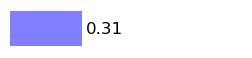

Buttergipfeli	Random Forest


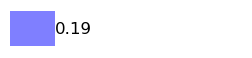

Butterzopf_mittel	Lineare Regression


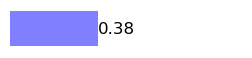

Crèmeschnitten	Random Forest


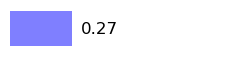

Hefe-Vanille-Weggli	Random Forest


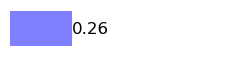

Laugenbrötli	Lineare Regression


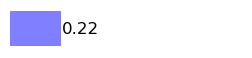

Laugengi.mit_SoBlu	Lineare Regression


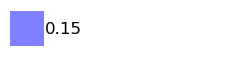

Maisgipfel	Lasso


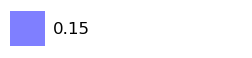

St._Gallerbürli	Lineare Regression


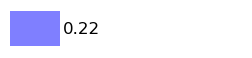

Weggli_normal	Random Forest


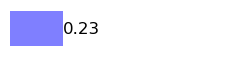

Il_pollo_forte_gefüllt	Random Forest


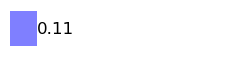

Quarkzöpfli	Lasso


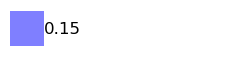

Schoggibrötli	Random Forest


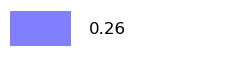

Erdbeertörtli	Lineare Regression


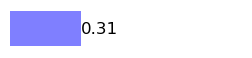

In [ ]:
def plot_bar(row):
    fig, ax = plt.subplots(figsize=(3, 0.5))
    ax.barh(row['Artikel'], row['MAPE'], color='b', alpha=0.5, height=0.001)
    ax.set_xlim(0, 1)
    ax.set_yticks([])
    ax.set_xticks([])
    plt.text(row['Best MAPE'], 0, f'{row["MAPE"]:.2f}', va='center', ha='left', fontsize=12)
    plt.box(False)
    plt.savefig(f"Plots/{row['Artikel']}_MAPE.png", dpi=300, bbox_inches='tight')
    plt.show()

# Display the table and the corresponding bar plots
for index, row in Artikel_MAPE.iterrows():
    print(f"{row['Artikel']}\t{row['Bestes Modell']}")
    plot_bar(row)


# Anhang

## Test-Optimierung des XGBoost Modells mit Cross Validation und Grid Search für Buttergipfeli

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Initialisieren des Modells
xgb = xgb.XGBRegressor()

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 300],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
}

# Erschaffen einer GridSearchCV object
xgb_CV_Buttergipfel = GridSearchCV(xgb, param_grid, scoring='r2', cv=5, n_jobs=-1, verbose=1)
xgb_CV_Buttergipfel.fit(X_buttergipfel_train, y_buttergipfel_train)

# Bestes Modell speichern
best_xgb = xgb_CV_Buttergipfel.best_estimator_

# KPIs berechnen
best_model_R2 = best_xgb.score(X_buttergipfel_train, y_buttergipfel_train)
y_pred_xgb = best_xgb.predict(X_buttergipfel_test)
best_model_RMSE = mean_squared_error(y_buttergipfel_test, y_pred_xgb, squared=False)
best_model_MAPE = mean_absolute_percentage_error(y_buttergipfel_test, y_pred_xgb)

print("Best Model R2:", best_model_R2)
print("Best Model RMSE:", best_model_RMSE)
print("Best Model MAPE:", best_model_MAPE)

# print best parameter after tuning
print(xgb_CV_Buttergipfel.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Model R2: 0.7600103017954999
Best Model RMSE: 40.40527586277704
Best Model MAPE: 0.18931041347763644
{'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}


## Test zum Anpassen von Extremwerten in der Menge

Vor allem der 'Butterzopf_mittel' sticht in der Analyse heraus. Er hat einen unglaublich hohen MAPE mit 62% Abweichung aber auch ein hohes R2 (0.84). Deshalb nehmen wir diesen Artikel als Startpunkt auf der Suche nach besserem Verständnis unseres Modells und den Eigenheiten des Datensatzes

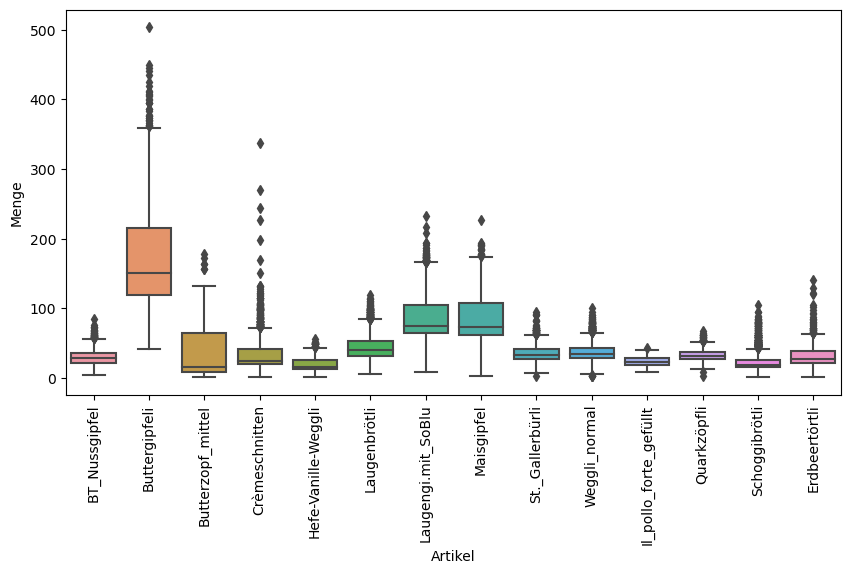

In [ ]:
# Boxplot aller Artikel
plt.figure(figsize=(10, 5))
sns.boxplot(x='Artikel', y='Menge', data=data_prep)
plt.xticks(rotation=90)
plt.show() 

In [ ]:
# Für Butterzopf_mittel: Berechnung der minimalen und maximalen Menge, sowie der Gesamtsumme der Menge
butterzopf_mittel = pre_optimized[data_prep['Artikel'] == 'Butterzopf_mittel']
print(butterzopf_mittel['Menge'].describe())
print('Summe: ', butterzopf_mittel['Menge'].sum())
print('Median: ', butterzopf_mittel['Menge'].median())


count    1556.000000
mean     33.820821  
std      33.645808  
min      1.000000   
25%      8.000000   
50%      15.000000  
75%      64.000000  
max      178.000000 
Name: Menge, dtype: float64
Summe:  52625.197132616486
Median:  15.0


Beim Butterzopf ist auffällig, dass bei einer relativ geringen Menge (16% von Verkaufsmenge Buttergipfel) eine hohe Variation in den gekauften Mengen besteht. Das erkennt man besonders daran, dass der Durchschnitt bei 31.6 liegt, während der Median nur bei 15 liegt.

Um dem entgegenzuwirken entfernen wir Werte größer 20, da wir davon ausgehen, dass solch große Mengen nicht ohne Voranküdigung gekauft werden. Und wenn der Kauf vorbestellt ist, dann ist er auch nicht mehr für unsere Prediciton relevant.

In [ ]:

butterzopf_mittel = butterzopf_mittel[butterzopf_mittel['Menge'] < 20]
butterzopf_test = XGB_train_and_evaluate_product_model(butterzopf_mittel, 'Butterzopf_mittel')
print(butterzopf_test)


AttributeError: 'XGBRegressor' object has no attribute 'XGBRegressor'

Mit sinkendem Maximalen Wert, ist die der MAPE ebenfalls. Deshalb wenden wir diese Cleaning Maßnahme nun auch im richtigen Modell an

In [ ]:
# Für Schoggibrötli: Berechnung der minimalen und maximalen Menge, sowie der Gesamtsumme der Menge
Schoggibrötli = data_prep[data_prep['Artikel'] == 'Schoggibrötli']
print(Schoggibrötli['Menge'].describe())
print('Summe: ', Schoggibrötli['Menge'].sum())
print('Median: ', Schoggibrötli['Menge'].median())

NameError: name 'data_prep' is not defined

In [ ]:
# Für Butterzopf_mittel: Berechnung der minimalen und maximalen Menge, sowie der Gesamtsumme der Menge
buttergipfeli = data_prep[data_prep['Artikel'] == 'Buttergipfeli']
print(buttergipfeli['Menge'].describe())
print('Summe: ', buttergipfeli['Menge'].sum())
print('Median: ', buttergipfeli['Menge'].median())

Im Vergleich mit dem Buttergipfel zeigt sich, dass 

# Ablage

In [ ]:
# One-Hot-Encoding für die Spalte "Artikel"
#data_prep = pd. get_dummies (data_prep, columns = [ 'Artikel' ])

# Gruppieren der Daten nach Datum und berechnen der Summe der Menge pro Artikel
#sum_cols = ['Menge', 'Bestellungen']

mean_cols = ['Temperatur Schnitt Tag','Niederschlag Summe Tag', 
             'Globalstrahlung Schnitt Tag', 'Fastenzeit','Ramadan']

for col in data_prep.columns:
    if col.startswith(('Ferienzeit', 'Geschmack', 'Feiertag', 'Vortag von', 'Ferienzeit SG')):
        mean_cols.append(col)

agg_dict = {col: 'sum' for col in sum_cols}
agg_dict.update({col: 'mean' for col in mean_cols})

data_prep = data_prep.groupby(['Datum', 'Artikel']).agg(agg_dict).reset_index()

# Ersetzen der Leerzeichen in Artikel mit Unterstrich
data_prep['Artikel'] = data_prep['Artikel'].str.replace(' ', '_')
data_prep = data_prep.drop('Datum', axis = 1)
data_prep.head()

In [ ]:
buttergipfel = data[data['Artikel'] == 'Buttergipfeli']
buttergipfel.head()

# Splitten des Datensets in Trainings- und Testdaten
X = buttergipfel.drop(['Menge', 'Artikel'], axis=1)
y = buttergipfel['Menge']

X_buttergipfel_train, X_buttergipfel_test, y_buttergipfel_train, y_buttergipfel_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Erstellen des Modells
model_Buttergipfeli_xgb = xgb.XGBRegressor(objective ='reg:squarederror')

# Trainieren des Modells
model_Buttergipfeli_xgb.fit(X_buttergipfel_train, y_buttergipfel_train)

# Vorhersagen mit dem Modell
y_buttergipfel_pred = model_Buttergipfeli_xgb.predict(X_buttergipfel_test)

# Berechnen des MAPE
mape = mean_absolute_percentage_error(y_buttergipfel_test, y_buttergipfel_pred)
print('MAPE: %.3f' % mape)

Variable Importance Plot

In [ ]:
Maisgipfel = data[data['Artikel'] == 'Maisgipfel']
Maisgipfel.head()

# Splitten des Datensets in Trainings- und Testdaten
X = Maisgipfel.drop(['Menge', 'Artikel'], axis=1)
y = Maisgipfel['Menge']

X_Maisgipfel_train, X_Maisgipfel_test, y_Maisgipfel_train, y_Maisgipfel_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Erstellen des Modells
model_Maisgipfel_RF = RandomForestRegressor()

# Trainieren des Modells
model_Maisgipfel_RF.fit(X_Maisgipfel_train, y_Maisgipfel_train)

# Vorhersagen mit dem Modell
y_Laugenbrötli_pred = model_Maisgipfel_RF.predict(X_Maisgipfel_test)

# Berechnen des MAPE
mape = mean_absolute_percentage_error(y_Maisgipfel_test, y_Laugenbrötli_pred)
print('MAPE: %.3f' % mape)

In [ ]:
def plot_variable_importance(model_Maisgipfel_RF, X_Maisgipfel_train):
    from pandas import DataFrame
    imp=DataFrame({"imp":model_Maisgipfel_RF.feature_importances_, "names":X_Maisgipfel_train.columns}).sort_values("imp", ascending=True)
    fig, ax = plt.subplots(figsize=(imp.shape[0]/6,imp.shape[0]/5), dpi=300) 
    ax.barh(imp["names"],imp["imp"], color="green") 
    ax.set_xlabel('\nVariable Importance')
    ax.set_ylabel('Features\n') 
    ax.set_title('Variable Importance Plot\n') 
    plt.show() 
plot_variable_importance(model_Maisgipfel_RF, X_Maisgipfel_train)